In [1]:
### Prepare module structure ###

import sys
sys.path.append("../")

In [2]:
### IMPORT ###

import numpy as np
import math
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

import time

import matplotlib.pyplot as plt
%matplotlib inline

from util import *
import data
import models

# auto reload imports on local changes
%load_ext autoreload
%autoreload 2
print(torch.__version__)

1.0.0


In [3]:
### Check device ###

USE_GPU = True

dtype = torch.float32

if USE_GPU and torch.cuda.is_available():
    # TODO: Change to CPU used!
    device = torch.device('cuda:1')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda:1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


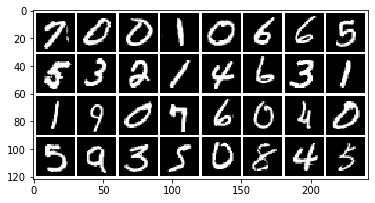

torch.Size([32, 1, 28, 28])


In [4]:
### LOAD DATA ###

dataset = 'mnist'
dataloader, imsize = data.load(dataset, path='/home/shared/phase-retrieval/data/' + dataset, batch_size=32)

sample = next(iter(dataloader['train']))
sample_ft =  torch.rfft(sample, 2, onesided=False)
sample_magnitudes = torch.sqrt(torch.sum(sample_ft ** 2, -1))

plot_grid(sample)
print(sample_magnitudes.shape)

In [5]:
def calc_mags(x):
    ft =  torch.rfft(x, 2, onesided=False)
    mags = torch.sqrt(torch.sum(ft ** 2, -1) + 1e-16)
    return mags

In [6]:
# Define loss

def gen_loss(gen_output, x):
    return  torch.mean((gen_output - x) ** 2)
    #return  torch.mean(torch.abs(gen_output - x))

In [7]:
# Reset model

gen = models.ConvNet(imsize, s=64)

Version 0.6
Additional padding to fit 2 exp: (4, 4)
Kern size: 1024


In [8]:
# Set training parameters

history = []
opt = optim.Adam(gen.parameters(), lr=1e-3)

In [9]:
# Initial loss

gen = gen.to(device)
sample = sample.to(device)
sample_magnitudes = sample_magnitudes.to(device)

gen_out = gen(sample_magnitudes)

loss = gen_loss(gen_out, sample)

print("Generator loss:", loss.item())

Generator loss: 0.2788967490196228


/home/alobe101/.local/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


In [10]:
def train_model(model, optimizer, device, loader_train, epochs=1):

    # move the model parameters to CPU/GPU
    model = model.to(device=device)
    
    history = []
    
    for e in range(epochs):

        for t, x in enumerate(loader_train):
            # put model to training mode
            model.train()
            
            # move x to device and reduce to magnitude information in fourier space
            x = x.to(device=device)
            magnitudes = calc_mags(x)

            # compute loss as pixel wise distance to original input
            x_pred = gen(magnitudes)
            
            loss = gen_loss(x_pred, x)
            #loss = torch.mean((x - out_real)**2) + torch.mean((phases - out_phases)**2)
            history.append(loss.item())

            # perform backprop and learning step
            optimizer.zero_grad()
            loss.backward() 
            optimizer.step()

            if t % 100 == 0:
                print("epoch: {:2} \t step:{} \t loss: {:3.4}".format(e+1, t, history[-1]))
                
        plt.plot(history)
        plt.show()
                
    return history

/home/alobe101/.local/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


epoch:  1 	 step:0 	 loss: 0.2761
epoch:  1 	 step:100 	 loss: 0.05673
epoch:  1 	 step:200 	 loss: 0.05786
epoch:  1 	 step:300 	 loss: 0.04861
epoch:  1 	 step:400 	 loss: 0.04144
epoch:  1 	 step:500 	 loss: 0.04375
epoch:  1 	 step:600 	 loss: 0.04128
epoch:  1 	 step:700 	 loss: 0.04125
epoch:  1 	 step:800 	 loss: 0.03505
epoch:  1 	 step:900 	 loss: 0.03223
epoch:  1 	 step:1000 	 loss: 0.04412
epoch:  1 	 step:1100 	 loss: 0.02749
epoch:  1 	 step:1200 	 loss: 0.03386
epoch:  1 	 step:1300 	 loss: 0.03369
epoch:  1 	 step:1400 	 loss: 0.02895
epoch:  1 	 step:1500 	 loss: 0.03268
epoch:  1 	 step:1600 	 loss: 0.02715
epoch:  1 	 step:1700 	 loss: 0.03127
epoch:  1 	 step:1800 	 loss: 0.02735


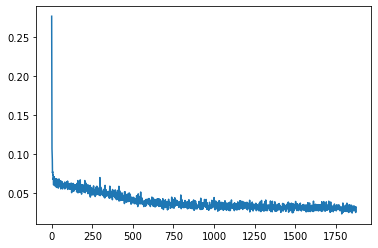

epoch:  2 	 step:0 	 loss: 0.03129
epoch:  2 	 step:100 	 loss: 0.02899
epoch:  2 	 step:200 	 loss: 0.03214
epoch:  2 	 step:300 	 loss: 0.03151
epoch:  2 	 step:400 	 loss: 0.02911
epoch:  2 	 step:500 	 loss: 0.02802
epoch:  2 	 step:600 	 loss: 0.03023
epoch:  2 	 step:700 	 loss: 0.0303
epoch:  2 	 step:800 	 loss: 0.0263
epoch:  2 	 step:900 	 loss: 0.02471
epoch:  2 	 step:1000 	 loss: 0.02648
epoch:  2 	 step:1100 	 loss: 0.02638
epoch:  2 	 step:1200 	 loss: 0.03628
epoch:  2 	 step:1300 	 loss: 0.02536
epoch:  2 	 step:1400 	 loss: 0.02671
epoch:  2 	 step:1500 	 loss: 0.02771
epoch:  2 	 step:1600 	 loss: 0.02751
epoch:  2 	 step:1700 	 loss: 0.02459
epoch:  2 	 step:1800 	 loss: 0.03006


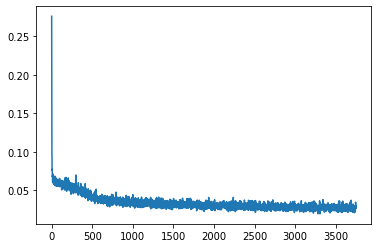

epoch:  3 	 step:0 	 loss: 0.02538
epoch:  3 	 step:100 	 loss: 0.02534
epoch:  3 	 step:200 	 loss: 0.02572
epoch:  3 	 step:300 	 loss: 0.02401
epoch:  3 	 step:400 	 loss: 0.024
epoch:  3 	 step:500 	 loss: 0.0289
epoch:  3 	 step:600 	 loss: 0.02245
epoch:  3 	 step:700 	 loss: 0.02385
epoch:  3 	 step:800 	 loss: 0.02849
epoch:  3 	 step:900 	 loss: 0.02332
epoch:  3 	 step:1000 	 loss: 0.02777
epoch:  3 	 step:1100 	 loss: 0.02752
epoch:  3 	 step:1200 	 loss: 0.03372
epoch:  3 	 step:1300 	 loss: 0.02361
epoch:  3 	 step:1400 	 loss: 0.02568
epoch:  3 	 step:1500 	 loss: 0.02007
epoch:  3 	 step:1600 	 loss: 0.0266
epoch:  3 	 step:1700 	 loss: 0.02072
epoch:  3 	 step:1800 	 loss: 0.0253


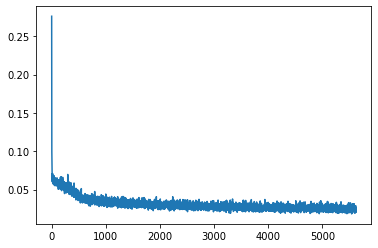

epoch:  4 	 step:0 	 loss: 0.0263
epoch:  4 	 step:100 	 loss: 0.02522
epoch:  4 	 step:200 	 loss: 0.02682
epoch:  4 	 step:300 	 loss: 0.02704
epoch:  4 	 step:400 	 loss: 0.02113
epoch:  4 	 step:500 	 loss: 0.0238
epoch:  4 	 step:600 	 loss: 0.02756
epoch:  4 	 step:700 	 loss: 0.0262
epoch:  4 	 step:800 	 loss: 0.0232
epoch:  4 	 step:900 	 loss: 0.01967
epoch:  4 	 step:1000 	 loss: 0.02394
epoch:  4 	 step:1100 	 loss: 0.0236
epoch:  4 	 step:1200 	 loss: 0.02429
epoch:  4 	 step:1300 	 loss: 0.02383
epoch:  4 	 step:1400 	 loss: 0.02639
epoch:  4 	 step:1500 	 loss: 0.02249
epoch:  4 	 step:1600 	 loss: 0.02455
epoch:  4 	 step:1700 	 loss: 0.02582
epoch:  4 	 step:1800 	 loss: 0.02202


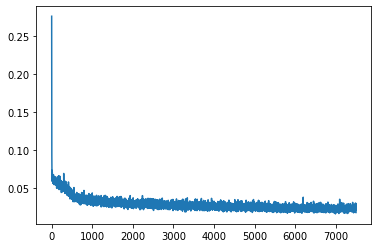

epoch:  5 	 step:0 	 loss: 0.01882
epoch:  5 	 step:100 	 loss: 0.02532
epoch:  5 	 step:200 	 loss: 0.02217
epoch:  5 	 step:300 	 loss: 0.02109
epoch:  5 	 step:400 	 loss: 0.01982
epoch:  5 	 step:500 	 loss: 0.02234
epoch:  5 	 step:600 	 loss: 0.02276
epoch:  5 	 step:700 	 loss: 0.02229
epoch:  5 	 step:800 	 loss: 0.0226
epoch:  5 	 step:900 	 loss: 0.02274
epoch:  5 	 step:1000 	 loss: 0.02242
epoch:  5 	 step:1100 	 loss: 0.02669
epoch:  5 	 step:1200 	 loss: 0.02636
epoch:  5 	 step:1300 	 loss: 0.01915
epoch:  5 	 step:1400 	 loss: 0.0235
epoch:  5 	 step:1500 	 loss: 0.02042
epoch:  5 	 step:1600 	 loss: 0.0187
epoch:  5 	 step:1700 	 loss: 0.02475
epoch:  5 	 step:1800 	 loss: 0.02387


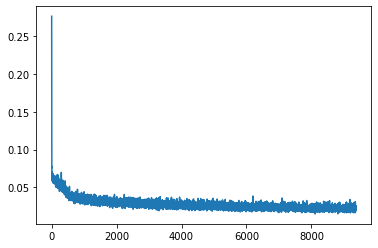

epoch:  6 	 step:0 	 loss: 0.02052
epoch:  6 	 step:100 	 loss: 0.02263
epoch:  6 	 step:200 	 loss: 0.01762
epoch:  6 	 step:300 	 loss: 0.02151
epoch:  6 	 step:400 	 loss: 0.01861
epoch:  6 	 step:500 	 loss: 0.02143
epoch:  6 	 step:600 	 loss: 0.02107
epoch:  6 	 step:700 	 loss: 0.02188
epoch:  6 	 step:800 	 loss: 0.01838
epoch:  6 	 step:900 	 loss: 0.02147
epoch:  6 	 step:1000 	 loss: 0.02269
epoch:  6 	 step:1100 	 loss: 0.01904
epoch:  6 	 step:1200 	 loss: 0.01913
epoch:  6 	 step:1300 	 loss: 0.02167
epoch:  6 	 step:1400 	 loss: 0.02126
epoch:  6 	 step:1500 	 loss: 0.01846
epoch:  6 	 step:1600 	 loss: 0.02133
epoch:  6 	 step:1700 	 loss: 0.0223
epoch:  6 	 step:1800 	 loss: 0.02091


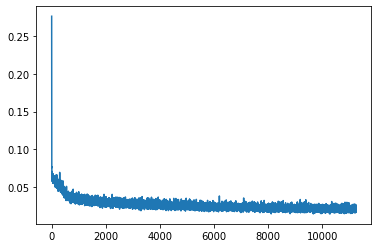

epoch:  7 	 step:0 	 loss: 0.02405
epoch:  7 	 step:100 	 loss: 0.01942
epoch:  7 	 step:200 	 loss: 0.01671
epoch:  7 	 step:300 	 loss: 0.02199
epoch:  7 	 step:400 	 loss: 0.02423
epoch:  7 	 step:500 	 loss: 0.0187
epoch:  7 	 step:600 	 loss: 0.02043
epoch:  7 	 step:700 	 loss: 0.02162
epoch:  7 	 step:800 	 loss: 0.02109
epoch:  7 	 step:900 	 loss: 0.02197
epoch:  7 	 step:1000 	 loss: 0.01994
epoch:  7 	 step:1100 	 loss: 0.01906
epoch:  7 	 step:1200 	 loss: 0.01475
epoch:  7 	 step:1300 	 loss: 0.01798
epoch:  7 	 step:1400 	 loss: 0.0197
epoch:  7 	 step:1500 	 loss: 0.02109
epoch:  7 	 step:1600 	 loss: 0.01868
epoch:  7 	 step:1700 	 loss: 0.02224
epoch:  7 	 step:1800 	 loss: 0.02145


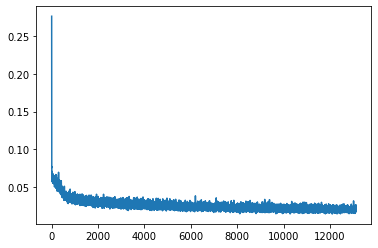

epoch:  8 	 step:0 	 loss: 0.01828
epoch:  8 	 step:100 	 loss: 0.02351
epoch:  8 	 step:200 	 loss: 0.01922
epoch:  8 	 step:300 	 loss: 0.01729
epoch:  8 	 step:400 	 loss: 0.0181
epoch:  8 	 step:500 	 loss: 0.02154
epoch:  8 	 step:600 	 loss: 0.01628
epoch:  8 	 step:700 	 loss: 0.02008
epoch:  8 	 step:800 	 loss: 0.0182
epoch:  8 	 step:900 	 loss: 0.01926
epoch:  8 	 step:1000 	 loss: 0.01993
epoch:  8 	 step:1100 	 loss: 0.01709
epoch:  8 	 step:1200 	 loss: 0.02105
epoch:  8 	 step:1300 	 loss: 0.01595
epoch:  8 	 step:1400 	 loss: 0.01892
epoch:  8 	 step:1500 	 loss: 0.01655
epoch:  8 	 step:1600 	 loss: 0.02059
epoch:  8 	 step:1700 	 loss: 0.01922
epoch:  8 	 step:1800 	 loss: 0.0224


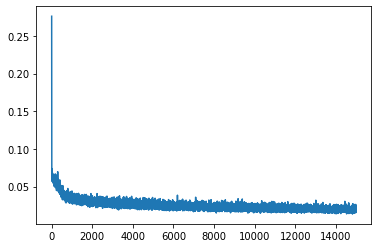

epoch:  9 	 step:0 	 loss: 0.01822
epoch:  9 	 step:100 	 loss: 0.02467
epoch:  9 	 step:200 	 loss: 0.01663
epoch:  9 	 step:300 	 loss: 0.01927
epoch:  9 	 step:400 	 loss: 0.01724
epoch:  9 	 step:500 	 loss: 0.0193
epoch:  9 	 step:600 	 loss: 0.0187
epoch:  9 	 step:700 	 loss: 0.01984
epoch:  9 	 step:800 	 loss: 0.01586
epoch:  9 	 step:900 	 loss: 0.01902
epoch:  9 	 step:1000 	 loss: 0.0228
epoch:  9 	 step:1100 	 loss: 0.01971
epoch:  9 	 step:1200 	 loss: 0.01977
epoch:  9 	 step:1300 	 loss: 0.01931
epoch:  9 	 step:1400 	 loss: 0.02365
epoch:  9 	 step:1500 	 loss: 0.01664
epoch:  9 	 step:1600 	 loss: 0.01768
epoch:  9 	 step:1700 	 loss: 0.01941
epoch:  9 	 step:1800 	 loss: 0.0203


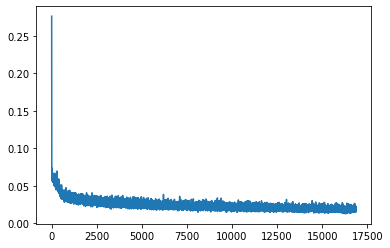

epoch: 10 	 step:0 	 loss: 0.01632
epoch: 10 	 step:100 	 loss: 0.01961
epoch: 10 	 step:200 	 loss: 0.01577
epoch: 10 	 step:300 	 loss: 0.01653
epoch: 10 	 step:400 	 loss: 0.01608
epoch: 10 	 step:500 	 loss: 0.0188
epoch: 10 	 step:600 	 loss: 0.01639
epoch: 10 	 step:700 	 loss: 0.01965
epoch: 10 	 step:800 	 loss: 0.01923
epoch: 10 	 step:900 	 loss: 0.01678
epoch: 10 	 step:1000 	 loss: 0.01695
epoch: 10 	 step:1100 	 loss: 0.01638
epoch: 10 	 step:1200 	 loss: 0.02165
epoch: 10 	 step:1300 	 loss: 0.02047
epoch: 10 	 step:1400 	 loss: 0.01533
epoch: 10 	 step:1500 	 loss: 0.01848
epoch: 10 	 step:1600 	 loss: 0.01674
epoch: 10 	 step:1700 	 loss: 0.01775
epoch: 10 	 step:1800 	 loss: 0.02043


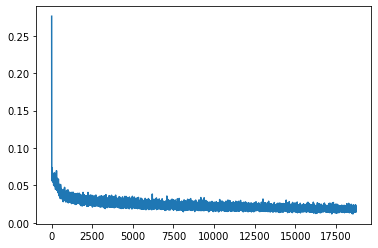

epoch: 11 	 step:0 	 loss: 0.01812
epoch: 11 	 step:100 	 loss: 0.01834
epoch: 11 	 step:200 	 loss: 0.01864
epoch: 11 	 step:300 	 loss: 0.01861
epoch: 11 	 step:400 	 loss: 0.01846
epoch: 11 	 step:500 	 loss: 0.01699
epoch: 11 	 step:600 	 loss: 0.02168
epoch: 11 	 step:700 	 loss: 0.01721
epoch: 11 	 step:800 	 loss: 0.01915
epoch: 11 	 step:900 	 loss: 0.01974
epoch: 11 	 step:1000 	 loss: 0.01797
epoch: 11 	 step:1100 	 loss: 0.01608
epoch: 11 	 step:1200 	 loss: 0.01932
epoch: 11 	 step:1300 	 loss: 0.01728
epoch: 11 	 step:1400 	 loss: 0.01873
epoch: 11 	 step:1500 	 loss: 0.01925
epoch: 11 	 step:1600 	 loss: 0.02238
epoch: 11 	 step:1700 	 loss: 0.01646
epoch: 11 	 step:1800 	 loss: 0.01588


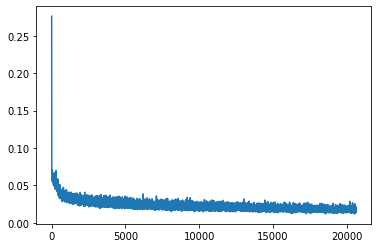

epoch: 12 	 step:0 	 loss: 0.01919
epoch: 12 	 step:100 	 loss: 0.01758
epoch: 12 	 step:200 	 loss: 0.01432
epoch: 12 	 step:300 	 loss: 0.0181
epoch: 12 	 step:400 	 loss: 0.01689
epoch: 12 	 step:500 	 loss: 0.01537
epoch: 12 	 step:600 	 loss: 0.01643
epoch: 12 	 step:700 	 loss: 0.01987
epoch: 12 	 step:800 	 loss: 0.01438
epoch: 12 	 step:900 	 loss: 0.01779
epoch: 12 	 step:1000 	 loss: 0.01564
epoch: 12 	 step:1100 	 loss: 0.01599
epoch: 12 	 step:1200 	 loss: 0.01925
epoch: 12 	 step:1300 	 loss: 0.0165
epoch: 12 	 step:1400 	 loss: 0.01985
epoch: 12 	 step:1500 	 loss: 0.01608
epoch: 12 	 step:1600 	 loss: 0.01993
epoch: 12 	 step:1700 	 loss: 0.01866
epoch: 12 	 step:1800 	 loss: 0.01727


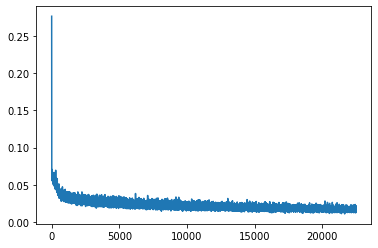

epoch: 13 	 step:0 	 loss: 0.01582
epoch: 13 	 step:100 	 loss: 0.01468
epoch: 13 	 step:200 	 loss: 0.01691
epoch: 13 	 step:300 	 loss: 0.01653
epoch: 13 	 step:400 	 loss: 0.01501
epoch: 13 	 step:500 	 loss: 0.01729
epoch: 13 	 step:600 	 loss: 0.01599
epoch: 13 	 step:700 	 loss: 0.01936
epoch: 13 	 step:800 	 loss: 0.01822
epoch: 13 	 step:900 	 loss: 0.0208
epoch: 13 	 step:1000 	 loss: 0.01383
epoch: 13 	 step:1100 	 loss: 0.01526
epoch: 13 	 step:1200 	 loss: 0.01546
epoch: 13 	 step:1300 	 loss: 0.01712
epoch: 13 	 step:1400 	 loss: 0.01645
epoch: 13 	 step:1500 	 loss: 0.02083
epoch: 13 	 step:1600 	 loss: 0.01893
epoch: 13 	 step:1700 	 loss: 0.01454
epoch: 13 	 step:1800 	 loss: 0.01675


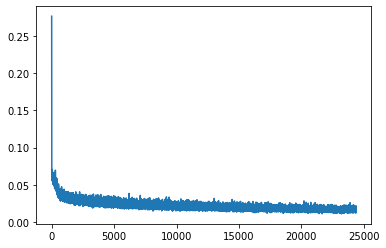

epoch: 14 	 step:0 	 loss: 0.01796
epoch: 14 	 step:100 	 loss: 0.01329
epoch: 14 	 step:200 	 loss: 0.01722
epoch: 14 	 step:300 	 loss: 0.01438
epoch: 14 	 step:400 	 loss: 0.01493
epoch: 14 	 step:500 	 loss: 0.01639
epoch: 14 	 step:600 	 loss: 0.01426
epoch: 14 	 step:700 	 loss: 0.01456
epoch: 14 	 step:800 	 loss: 0.0124
epoch: 14 	 step:900 	 loss: 0.01484
epoch: 14 	 step:1000 	 loss: 0.01461
epoch: 14 	 step:1100 	 loss: 0.01602
epoch: 14 	 step:1200 	 loss: 0.01695
epoch: 14 	 step:1300 	 loss: 0.01608
epoch: 14 	 step:1400 	 loss: 0.01511
epoch: 14 	 step:1500 	 loss: 0.01382
epoch: 14 	 step:1600 	 loss: 0.01747
epoch: 14 	 step:1700 	 loss: 0.01785
epoch: 14 	 step:1800 	 loss: 0.01424


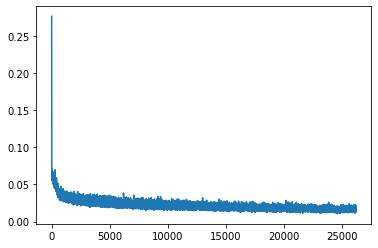

epoch: 15 	 step:0 	 loss: 0.01514
epoch: 15 	 step:100 	 loss: 0.01372
epoch: 15 	 step:200 	 loss: 0.01684
epoch: 15 	 step:300 	 loss: 0.01428
epoch: 15 	 step:400 	 loss: 0.01775
epoch: 15 	 step:500 	 loss: 0.01357
epoch: 15 	 step:600 	 loss: 0.01487
epoch: 15 	 step:700 	 loss: 0.01531
epoch: 15 	 step:800 	 loss: 0.01436
epoch: 15 	 step:900 	 loss: 0.01608
epoch: 15 	 step:1000 	 loss: 0.01885
epoch: 15 	 step:1100 	 loss: 0.01554
epoch: 15 	 step:1200 	 loss: 0.0162
epoch: 15 	 step:1300 	 loss: 0.01726
epoch: 15 	 step:1400 	 loss: 0.0137
epoch: 15 	 step:1500 	 loss: 0.01471
epoch: 15 	 step:1600 	 loss: 0.01613
epoch: 15 	 step:1700 	 loss: 0.01539
epoch: 15 	 step:1800 	 loss: 0.01497


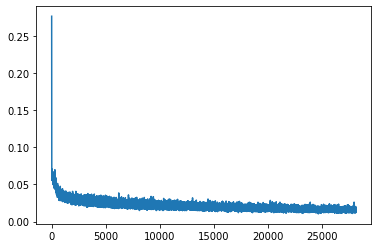

epoch: 16 	 step:0 	 loss: 0.01561
epoch: 16 	 step:100 	 loss: 0.01296
epoch: 16 	 step:200 	 loss: 0.01674
epoch: 16 	 step:300 	 loss: 0.01433
epoch: 16 	 step:400 	 loss: 0.01739
epoch: 16 	 step:500 	 loss: 0.01401
epoch: 16 	 step:600 	 loss: 0.01779
epoch: 16 	 step:700 	 loss: 0.01259
epoch: 16 	 step:800 	 loss: 0.01653
epoch: 16 	 step:900 	 loss: 0.01321
epoch: 16 	 step:1000 	 loss: 0.01276
epoch: 16 	 step:1100 	 loss: 0.0139
epoch: 16 	 step:1200 	 loss: 0.01527
epoch: 16 	 step:1300 	 loss: 0.01538
epoch: 16 	 step:1400 	 loss: 0.01471
epoch: 16 	 step:1500 	 loss: 0.01563
epoch: 16 	 step:1600 	 loss: 0.01542
epoch: 16 	 step:1700 	 loss: 0.01452
epoch: 16 	 step:1800 	 loss: 0.01639


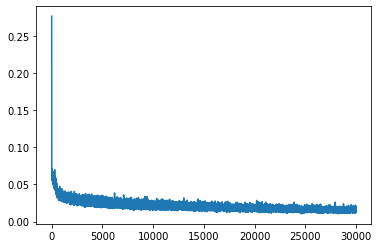

epoch: 17 	 step:0 	 loss: 0.0151
epoch: 17 	 step:100 	 loss: 0.01302
epoch: 17 	 step:200 	 loss: 0.0152
epoch: 17 	 step:300 	 loss: 0.01213
epoch: 17 	 step:400 	 loss: 0.01447
epoch: 17 	 step:500 	 loss: 0.01742
epoch: 17 	 step:600 	 loss: 0.0164
epoch: 17 	 step:700 	 loss: 0.01532
epoch: 17 	 step:800 	 loss: 0.02024
epoch: 17 	 step:900 	 loss: 0.01672
epoch: 17 	 step:1000 	 loss: 0.01613
epoch: 17 	 step:1100 	 loss: 0.01395
epoch: 17 	 step:1200 	 loss: 0.01669
epoch: 17 	 step:1300 	 loss: 0.01281
epoch: 17 	 step:1400 	 loss: 0.01248
epoch: 17 	 step:1500 	 loss: 0.01419
epoch: 17 	 step:1600 	 loss: 0.01432
epoch: 17 	 step:1700 	 loss: 0.0172
epoch: 17 	 step:1800 	 loss: 0.01325


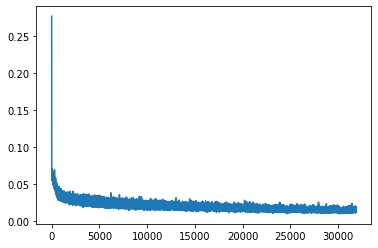

epoch: 18 	 step:0 	 loss: 0.01422
epoch: 18 	 step:100 	 loss: 0.0149
epoch: 18 	 step:200 	 loss: 0.01176
epoch: 18 	 step:300 	 loss: 0.01299
epoch: 18 	 step:400 	 loss: 0.01162
epoch: 18 	 step:500 	 loss: 0.01167
epoch: 18 	 step:600 	 loss: 0.01568
epoch: 18 	 step:700 	 loss: 0.01398
epoch: 18 	 step:800 	 loss: 0.01252
epoch: 18 	 step:900 	 loss: 0.01508
epoch: 18 	 step:1000 	 loss: 0.01363
epoch: 18 	 step:1100 	 loss: 0.01512
epoch: 18 	 step:1200 	 loss: 0.01412
epoch: 18 	 step:1300 	 loss: 0.01481
epoch: 18 	 step:1400 	 loss: 0.01479
epoch: 18 	 step:1500 	 loss: 0.01344
epoch: 18 	 step:1600 	 loss: 0.01559
epoch: 18 	 step:1700 	 loss: 0.01628
epoch: 18 	 step:1800 	 loss: 0.01448


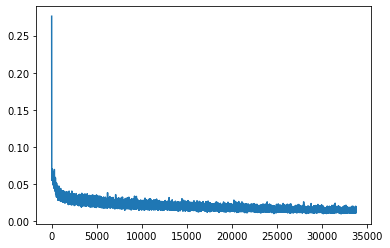

epoch: 19 	 step:0 	 loss: 0.01385
epoch: 19 	 step:100 	 loss: 0.01229
epoch: 19 	 step:200 	 loss: 0.01347
epoch: 19 	 step:300 	 loss: 0.01232
epoch: 19 	 step:400 	 loss: 0.01506
epoch: 19 	 step:500 	 loss: 0.01375
epoch: 19 	 step:600 	 loss: 0.01561
epoch: 19 	 step:700 	 loss: 0.01676
epoch: 19 	 step:800 	 loss: 0.0126
epoch: 19 	 step:900 	 loss: 0.01236
epoch: 19 	 step:1000 	 loss: 0.01273
epoch: 19 	 step:1100 	 loss: 0.01198
epoch: 19 	 step:1200 	 loss: 0.01255
epoch: 19 	 step:1300 	 loss: 0.01514
epoch: 19 	 step:1400 	 loss: 0.01879
epoch: 19 	 step:1500 	 loss: 0.01147
epoch: 19 	 step:1600 	 loss: 0.0141
epoch: 19 	 step:1700 	 loss: 0.01309
epoch: 19 	 step:1800 	 loss: 0.01769


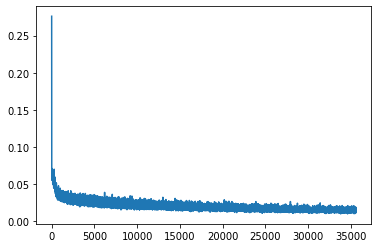

epoch: 20 	 step:0 	 loss: 0.01202
epoch: 20 	 step:100 	 loss: 0.01478
epoch: 20 	 step:200 	 loss: 0.01188
epoch: 20 	 step:300 	 loss: 0.01128
epoch: 20 	 step:400 	 loss: 0.01507
epoch: 20 	 step:500 	 loss: 0.01262
epoch: 20 	 step:600 	 loss: 0.01207
epoch: 20 	 step:700 	 loss: 0.01261
epoch: 20 	 step:800 	 loss: 0.0126
epoch: 20 	 step:900 	 loss: 0.01355
epoch: 20 	 step:1000 	 loss: 0.01302
epoch: 20 	 step:1100 	 loss: 0.01504
epoch: 20 	 step:1200 	 loss: 0.01564
epoch: 20 	 step:1300 	 loss: 0.01395
epoch: 20 	 step:1400 	 loss: 0.01799
epoch: 20 	 step:1500 	 loss: 0.01859
epoch: 20 	 step:1600 	 loss: 0.01499
epoch: 20 	 step:1700 	 loss: 0.01204
epoch: 20 	 step:1800 	 loss: 0.01399


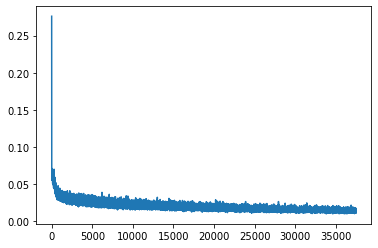

epoch: 21 	 step:0 	 loss: 0.01298
epoch: 21 	 step:100 	 loss: 0.01153
epoch: 21 	 step:200 	 loss: 0.01333
epoch: 21 	 step:300 	 loss: 0.01282
epoch: 21 	 step:400 	 loss: 0.01328
epoch: 21 	 step:500 	 loss: 0.01191
epoch: 21 	 step:600 	 loss: 0.0119
epoch: 21 	 step:700 	 loss: 0.01324
epoch: 21 	 step:800 	 loss: 0.01348
epoch: 21 	 step:900 	 loss: 0.01415
epoch: 21 	 step:1000 	 loss: 0.01578
epoch: 21 	 step:1100 	 loss: 0.01185
epoch: 21 	 step:1200 	 loss: 0.01675
epoch: 21 	 step:1300 	 loss: 0.01242
epoch: 21 	 step:1400 	 loss: 0.01242
epoch: 21 	 step:1500 	 loss: 0.01265
epoch: 21 	 step:1600 	 loss: 0.01138
epoch: 21 	 step:1700 	 loss: 0.01192
epoch: 21 	 step:1800 	 loss: 0.01363


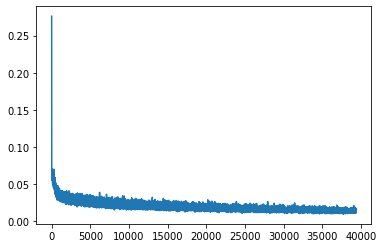

epoch: 22 	 step:0 	 loss: 0.01235
epoch: 22 	 step:100 	 loss: 0.01173
epoch: 22 	 step:200 	 loss: 0.01334
epoch: 22 	 step:300 	 loss: 0.01431
epoch: 22 	 step:400 	 loss: 0.01249
epoch: 22 	 step:500 	 loss: 0.01285
epoch: 22 	 step:600 	 loss: 0.01204
epoch: 22 	 step:700 	 loss: 0.01322
epoch: 22 	 step:800 	 loss: 0.01195
epoch: 22 	 step:900 	 loss: 0.01253
epoch: 22 	 step:1000 	 loss: 0.01543
epoch: 22 	 step:1100 	 loss: 0.0162
epoch: 22 	 step:1200 	 loss: 0.0117
epoch: 22 	 step:1300 	 loss: 0.01348
epoch: 22 	 step:1400 	 loss: 0.01138
epoch: 22 	 step:1500 	 loss: 0.01314
epoch: 22 	 step:1600 	 loss: 0.01385
epoch: 22 	 step:1700 	 loss: 0.01325
epoch: 22 	 step:1800 	 loss: 0.01164


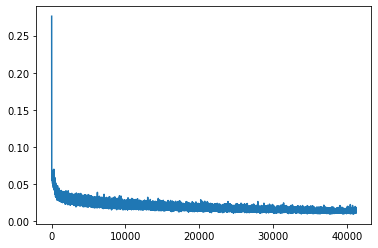

epoch: 23 	 step:0 	 loss: 0.01025
epoch: 23 	 step:100 	 loss: 0.01329
epoch: 23 	 step:200 	 loss: 0.01246
epoch: 23 	 step:300 	 loss: 0.01244
epoch: 23 	 step:400 	 loss: 0.01281
epoch: 23 	 step:500 	 loss: 0.01442
epoch: 23 	 step:600 	 loss: 0.01175
epoch: 23 	 step:700 	 loss: 0.01139
epoch: 23 	 step:800 	 loss: 0.01266
epoch: 23 	 step:900 	 loss: 0.01295
epoch: 23 	 step:1000 	 loss: 0.0123
epoch: 23 	 step:1100 	 loss: 0.01066
epoch: 23 	 step:1200 	 loss: 0.01392
epoch: 23 	 step:1300 	 loss: 0.01228
epoch: 23 	 step:1400 	 loss: 0.01177
epoch: 23 	 step:1500 	 loss: 0.01169
epoch: 23 	 step:1600 	 loss: 0.0129
epoch: 23 	 step:1700 	 loss: 0.01278
epoch: 23 	 step:1800 	 loss: 0.01359


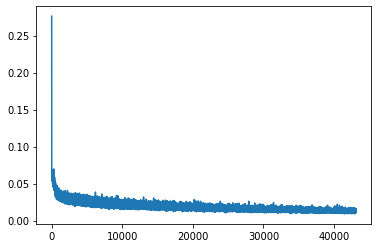

epoch: 24 	 step:0 	 loss: 0.01209
epoch: 24 	 step:100 	 loss: 0.01174
epoch: 24 	 step:200 	 loss: 0.01309
epoch: 24 	 step:300 	 loss: 0.0138
epoch: 24 	 step:400 	 loss: 0.01146
epoch: 24 	 step:500 	 loss: 0.01208
epoch: 24 	 step:600 	 loss: 0.01203
epoch: 24 	 step:700 	 loss: 0.01045
epoch: 24 	 step:800 	 loss: 0.01403
epoch: 24 	 step:900 	 loss: 0.01376
epoch: 24 	 step:1000 	 loss: 0.01251
epoch: 24 	 step:1100 	 loss: 0.01267
epoch: 24 	 step:1200 	 loss: 0.01264
epoch: 24 	 step:1300 	 loss: 0.01368
epoch: 24 	 step:1400 	 loss: 0.01203
epoch: 24 	 step:1500 	 loss: 0.01246
epoch: 24 	 step:1600 	 loss: 0.01206
epoch: 24 	 step:1700 	 loss: 0.0115
epoch: 24 	 step:1800 	 loss: 0.01018


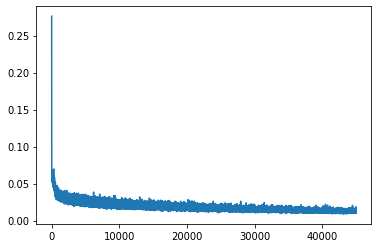

epoch: 25 	 step:0 	 loss: 0.01147
epoch: 25 	 step:100 	 loss: 0.01086
epoch: 25 	 step:200 	 loss: 0.01056
epoch: 25 	 step:300 	 loss: 0.01061
epoch: 25 	 step:400 	 loss: 0.01483
epoch: 25 	 step:500 	 loss: 0.01055
epoch: 25 	 step:600 	 loss: 0.0113
epoch: 25 	 step:700 	 loss: 0.01258
epoch: 25 	 step:800 	 loss: 0.01219
epoch: 25 	 step:900 	 loss: 0.011
epoch: 25 	 step:1000 	 loss: 0.01103
epoch: 25 	 step:1100 	 loss: 0.01239
epoch: 25 	 step:1200 	 loss: 0.01186
epoch: 25 	 step:1300 	 loss: 0.01148
epoch: 25 	 step:1400 	 loss: 0.01308
epoch: 25 	 step:1500 	 loss: 0.0128
epoch: 25 	 step:1600 	 loss: 0.01329
epoch: 25 	 step:1700 	 loss: 0.01283
epoch: 25 	 step:1800 	 loss: 0.01234


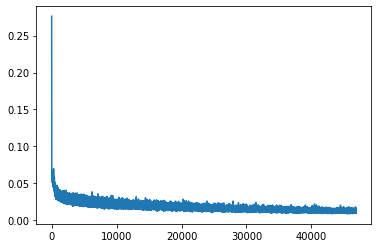

epoch: 26 	 step:0 	 loss: 0.01238
epoch: 26 	 step:100 	 loss: 0.009719
epoch: 26 	 step:200 	 loss: 0.01056
epoch: 26 	 step:300 	 loss: 0.01123
epoch: 26 	 step:400 	 loss: 0.01145
epoch: 26 	 step:500 	 loss: 0.009545
epoch: 26 	 step:600 	 loss: 0.01306
epoch: 26 	 step:700 	 loss: 0.01001
epoch: 26 	 step:800 	 loss: 0.01204
epoch: 26 	 step:900 	 loss: 0.0127
epoch: 26 	 step:1000 	 loss: 0.01527
epoch: 26 	 step:1100 	 loss: 0.01107
epoch: 26 	 step:1200 	 loss: 0.01133
epoch: 26 	 step:1300 	 loss: 0.01064
epoch: 26 	 step:1400 	 loss: 0.01236
epoch: 26 	 step:1500 	 loss: 0.01413
epoch: 26 	 step:1600 	 loss: 0.01366
epoch: 26 	 step:1700 	 loss: 0.01192
epoch: 26 	 step:1800 	 loss: 0.01383


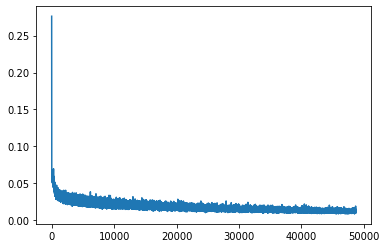

epoch: 27 	 step:0 	 loss: 0.0113
epoch: 27 	 step:100 	 loss: 0.01125
epoch: 27 	 step:200 	 loss: 0.01459
epoch: 27 	 step:300 	 loss: 0.01238
epoch: 27 	 step:400 	 loss: 0.01091
epoch: 27 	 step:500 	 loss: 0.01094
epoch: 27 	 step:600 	 loss: 0.01221
epoch: 27 	 step:700 	 loss: 0.01445
epoch: 27 	 step:800 	 loss: 0.0123
epoch: 27 	 step:900 	 loss: 0.01109
epoch: 27 	 step:1000 	 loss: 0.01286
epoch: 27 	 step:1100 	 loss: 0.01156
epoch: 27 	 step:1200 	 loss: 0.01011
epoch: 27 	 step:1300 	 loss: 0.01002
epoch: 27 	 step:1400 	 loss: 0.01302
epoch: 27 	 step:1500 	 loss: 0.01184
epoch: 27 	 step:1600 	 loss: 0.01155
epoch: 27 	 step:1700 	 loss: 0.01089
epoch: 27 	 step:1800 	 loss: 0.01132


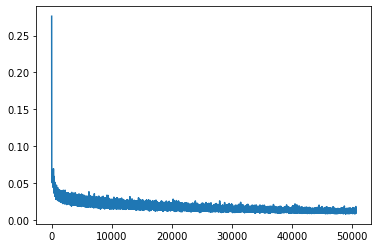

epoch: 28 	 step:0 	 loss: 0.01087
epoch: 28 	 step:100 	 loss: 0.009777
epoch: 28 	 step:200 	 loss: 0.01132
epoch: 28 	 step:300 	 loss: 0.01093
epoch: 28 	 step:400 	 loss: 0.01012
epoch: 28 	 step:500 	 loss: 0.01014
epoch: 28 	 step:600 	 loss: 0.009728
epoch: 28 	 step:700 	 loss: 0.01284
epoch: 28 	 step:800 	 loss: 0.01244
epoch: 28 	 step:900 	 loss: 0.01001
epoch: 28 	 step:1000 	 loss: 0.01162
epoch: 28 	 step:1100 	 loss: 0.00998
epoch: 28 	 step:1200 	 loss: 0.01111
epoch: 28 	 step:1300 	 loss: 0.009887
epoch: 28 	 step:1400 	 loss: 0.01095
epoch: 28 	 step:1500 	 loss: 0.01134
epoch: 28 	 step:1600 	 loss: 0.012
epoch: 28 	 step:1700 	 loss: 0.01099
epoch: 28 	 step:1800 	 loss: 0.01104


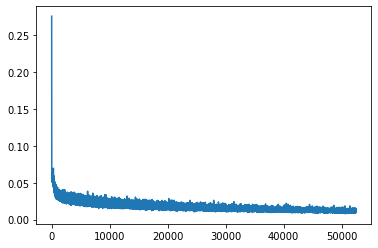

epoch: 29 	 step:0 	 loss: 0.009954
epoch: 29 	 step:100 	 loss: 0.01097
epoch: 29 	 step:200 	 loss: 0.01096
epoch: 29 	 step:300 	 loss: 0.01011
epoch: 29 	 step:400 	 loss: 0.01002
epoch: 29 	 step:500 	 loss: 0.009947
epoch: 29 	 step:600 	 loss: 0.009661
epoch: 29 	 step:700 	 loss: 0.01018
epoch: 29 	 step:800 	 loss: 0.01499
epoch: 29 	 step:900 	 loss: 0.01056
epoch: 29 	 step:1000 	 loss: 0.01244
epoch: 29 	 step:1100 	 loss: 0.01143
epoch: 29 	 step:1200 	 loss: 0.009404
epoch: 29 	 step:1300 	 loss: 0.01014
epoch: 29 	 step:1400 	 loss: 0.01107
epoch: 29 	 step:1500 	 loss: 0.01065
epoch: 29 	 step:1600 	 loss: 0.009474
epoch: 29 	 step:1700 	 loss: 0.01085
epoch: 29 	 step:1800 	 loss: 0.01814


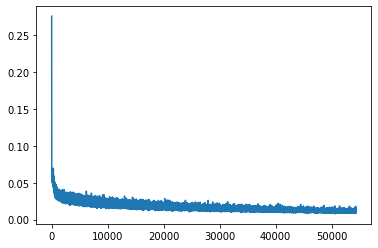

epoch: 30 	 step:0 	 loss: 0.009507
epoch: 30 	 step:100 	 loss: 0.01096
epoch: 30 	 step:200 	 loss: 0.009457
epoch: 30 	 step:300 	 loss: 0.008748
epoch: 30 	 step:400 	 loss: 0.01033
epoch: 30 	 step:500 	 loss: 0.01126
epoch: 30 	 step:600 	 loss: 0.0107
epoch: 30 	 step:700 	 loss: 0.01258
epoch: 30 	 step:800 	 loss: 0.009555
epoch: 30 	 step:900 	 loss: 0.009412
epoch: 30 	 step:1000 	 loss: 0.01074
epoch: 30 	 step:1100 	 loss: 0.01061
epoch: 30 	 step:1200 	 loss: 0.01237
epoch: 30 	 step:1300 	 loss: 0.01406
epoch: 30 	 step:1400 	 loss: 0.01005
epoch: 30 	 step:1500 	 loss: 0.009165
epoch: 30 	 step:1600 	 loss: 0.0104
epoch: 30 	 step:1700 	 loss: 0.01451
epoch: 30 	 step:1800 	 loss: 0.00999


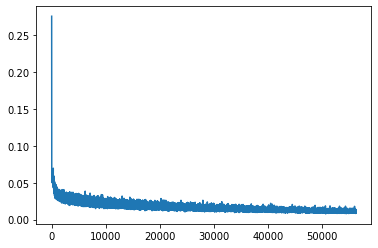

epoch: 31 	 step:0 	 loss: 0.01097
epoch: 31 	 step:100 	 loss: 0.008932
epoch: 31 	 step:200 	 loss: 0.009585
epoch: 31 	 step:300 	 loss: 0.01268
epoch: 31 	 step:400 	 loss: 0.009169
epoch: 31 	 step:500 	 loss: 0.009604
epoch: 31 	 step:600 	 loss: 0.01031
epoch: 31 	 step:700 	 loss: 0.01087
epoch: 31 	 step:800 	 loss: 0.009009
epoch: 31 	 step:900 	 loss: 0.01118
epoch: 31 	 step:1000 	 loss: 0.01058
epoch: 31 	 step:1100 	 loss: 0.0119
epoch: 31 	 step:1200 	 loss: 0.01117
epoch: 31 	 step:1300 	 loss: 0.01006
epoch: 31 	 step:1400 	 loss: 0.01089
epoch: 31 	 step:1500 	 loss: 0.012
epoch: 31 	 step:1600 	 loss: 0.008572
epoch: 31 	 step:1700 	 loss: 0.009467
epoch: 31 	 step:1800 	 loss: 0.01065


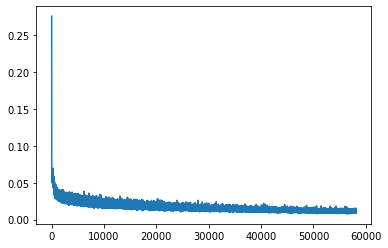

epoch: 32 	 step:0 	 loss: 0.01006
epoch: 32 	 step:100 	 loss: 0.009916
epoch: 32 	 step:200 	 loss: 0.01033
epoch: 32 	 step:300 	 loss: 0.009906
epoch: 32 	 step:400 	 loss: 0.009497
epoch: 32 	 step:500 	 loss: 0.009238
epoch: 32 	 step:600 	 loss: 0.008693
epoch: 32 	 step:700 	 loss: 0.01064
epoch: 32 	 step:800 	 loss: 0.01051
epoch: 32 	 step:900 	 loss: 0.01123
epoch: 32 	 step:1000 	 loss: 0.01269
epoch: 32 	 step:1100 	 loss: 0.009145
epoch: 32 	 step:1200 	 loss: 0.01006
epoch: 32 	 step:1300 	 loss: 0.0117
epoch: 32 	 step:1400 	 loss: 0.01092
epoch: 32 	 step:1500 	 loss: 0.01193
epoch: 32 	 step:1600 	 loss: 0.01122
epoch: 32 	 step:1700 	 loss: 0.009588
epoch: 32 	 step:1800 	 loss: 0.01103


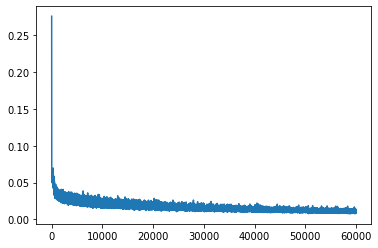

epoch: 33 	 step:0 	 loss: 0.009489
epoch: 33 	 step:100 	 loss: 0.009102
epoch: 33 	 step:200 	 loss: 0.009619
epoch: 33 	 step:300 	 loss: 0.009379
epoch: 33 	 step:400 	 loss: 0.009505
epoch: 33 	 step:500 	 loss: 0.01033
epoch: 33 	 step:600 	 loss: 0.009326
epoch: 33 	 step:700 	 loss: 0.01021
epoch: 33 	 step:800 	 loss: 0.01001
epoch: 33 	 step:900 	 loss: 0.01181
epoch: 33 	 step:1000 	 loss: 0.0087
epoch: 33 	 step:1100 	 loss: 0.008481
epoch: 33 	 step:1200 	 loss: 0.009505
epoch: 33 	 step:1300 	 loss: 0.01031
epoch: 33 	 step:1400 	 loss: 0.01046
epoch: 33 	 step:1500 	 loss: 0.009711
epoch: 33 	 step:1600 	 loss: 0.009354
epoch: 33 	 step:1700 	 loss: 0.009814
epoch: 33 	 step:1800 	 loss: 0.009721


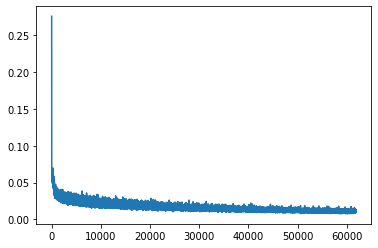

epoch: 34 	 step:0 	 loss: 0.009627
epoch: 34 	 step:100 	 loss: 0.01058
epoch: 34 	 step:200 	 loss: 0.009939
epoch: 34 	 step:300 	 loss: 0.007902
epoch: 34 	 step:400 	 loss: 0.009886
epoch: 34 	 step:500 	 loss: 0.009452
epoch: 34 	 step:600 	 loss: 0.008296
epoch: 34 	 step:700 	 loss: 0.01247
epoch: 34 	 step:800 	 loss: 0.009409
epoch: 34 	 step:900 	 loss: 0.01004
epoch: 34 	 step:1000 	 loss: 0.008903
epoch: 34 	 step:1100 	 loss: 0.00939
epoch: 34 	 step:1200 	 loss: 0.01268
epoch: 34 	 step:1300 	 loss: 0.01164
epoch: 34 	 step:1400 	 loss: 0.009685
epoch: 34 	 step:1500 	 loss: 0.01045
epoch: 34 	 step:1600 	 loss: 0.009695
epoch: 34 	 step:1700 	 loss: 0.01082
epoch: 34 	 step:1800 	 loss: 0.009327


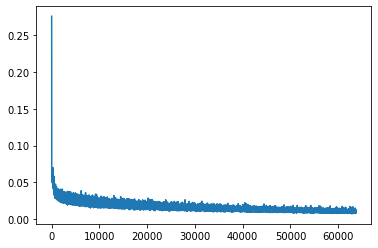

epoch: 35 	 step:0 	 loss: 0.009051
epoch: 35 	 step:100 	 loss: 0.00898
epoch: 35 	 step:200 	 loss: 0.008597
epoch: 35 	 step:300 	 loss: 0.009597
epoch: 35 	 step:400 	 loss: 0.009832
epoch: 35 	 step:500 	 loss: 0.00952
epoch: 35 	 step:600 	 loss: 0.01052
epoch: 35 	 step:700 	 loss: 0.007543
epoch: 35 	 step:800 	 loss: 0.01059
epoch: 35 	 step:900 	 loss: 0.00866
epoch: 35 	 step:1000 	 loss: 0.009146
epoch: 35 	 step:1100 	 loss: 0.01013
epoch: 35 	 step:1200 	 loss: 0.008585
epoch: 35 	 step:1300 	 loss: 0.009998
epoch: 35 	 step:1400 	 loss: 0.009319
epoch: 35 	 step:1500 	 loss: 0.01027
epoch: 35 	 step:1600 	 loss: 0.008972
epoch: 35 	 step:1700 	 loss: 0.01001
epoch: 35 	 step:1800 	 loss: 0.01024


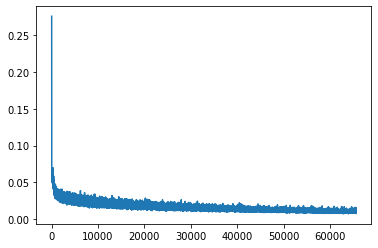

epoch: 36 	 step:0 	 loss: 0.01055
epoch: 36 	 step:100 	 loss: 0.008544
epoch: 36 	 step:200 	 loss: 0.009387
epoch: 36 	 step:300 	 loss: 0.008971
epoch: 36 	 step:400 	 loss: 0.00924
epoch: 36 	 step:500 	 loss: 0.009148
epoch: 36 	 step:600 	 loss: 0.008312
epoch: 36 	 step:700 	 loss: 0.01
epoch: 36 	 step:800 	 loss: 0.008576
epoch: 36 	 step:900 	 loss: 0.009481
epoch: 36 	 step:1000 	 loss: 0.008046
epoch: 36 	 step:1100 	 loss: 0.009273
epoch: 36 	 step:1200 	 loss: 0.01117
epoch: 36 	 step:1300 	 loss: 0.01083
epoch: 36 	 step:1400 	 loss: 0.009567
epoch: 36 	 step:1500 	 loss: 0.009833
epoch: 36 	 step:1600 	 loss: 0.01122
epoch: 36 	 step:1700 	 loss: 0.01081
epoch: 36 	 step:1800 	 loss: 0.009844


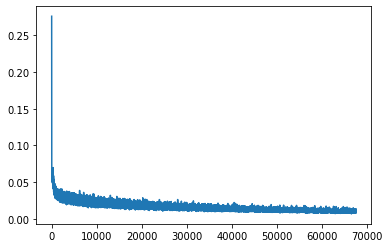

epoch: 37 	 step:0 	 loss: 0.01076
epoch: 37 	 step:100 	 loss: 0.00998
epoch: 37 	 step:200 	 loss: 0.01008
epoch: 37 	 step:300 	 loss: 0.009049
epoch: 37 	 step:400 	 loss: 0.008803
epoch: 37 	 step:500 	 loss: 0.009532
epoch: 37 	 step:600 	 loss: 0.008425
epoch: 37 	 step:700 	 loss: 0.008975
epoch: 37 	 step:800 	 loss: 0.009053
epoch: 37 	 step:900 	 loss: 0.008394
epoch: 37 	 step:1000 	 loss: 0.009428
epoch: 37 	 step:1100 	 loss: 0.01056
epoch: 37 	 step:1200 	 loss: 0.009255
epoch: 37 	 step:1300 	 loss: 0.008629
epoch: 37 	 step:1400 	 loss: 0.008635
epoch: 37 	 step:1500 	 loss: 0.009673
epoch: 37 	 step:1600 	 loss: 0.008932
epoch: 37 	 step:1700 	 loss: 0.009682
epoch: 37 	 step:1800 	 loss: 0.01229


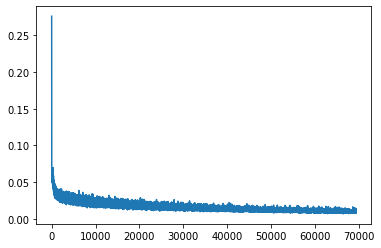

epoch: 38 	 step:0 	 loss: 0.007747
epoch: 38 	 step:100 	 loss: 0.007247
epoch: 38 	 step:200 	 loss: 0.009862
epoch: 38 	 step:300 	 loss: 0.008419
epoch: 38 	 step:400 	 loss: 0.01044
epoch: 38 	 step:500 	 loss: 0.01058
epoch: 38 	 step:600 	 loss: 0.009613
epoch: 38 	 step:700 	 loss: 0.007764
epoch: 38 	 step:800 	 loss: 0.009055
epoch: 38 	 step:900 	 loss: 0.009279
epoch: 38 	 step:1000 	 loss: 0.009697
epoch: 38 	 step:1100 	 loss: 0.009546
epoch: 38 	 step:1200 	 loss: 0.01023
epoch: 38 	 step:1300 	 loss: 0.00923
epoch: 38 	 step:1400 	 loss: 0.01024
epoch: 38 	 step:1500 	 loss: 0.009556
epoch: 38 	 step:1600 	 loss: 0.008194
epoch: 38 	 step:1700 	 loss: 0.01106
epoch: 38 	 step:1800 	 loss: 0.01198


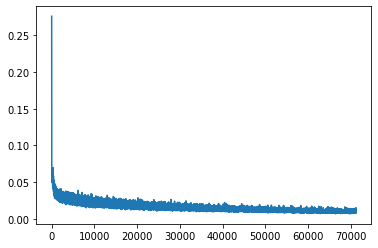

epoch: 39 	 step:0 	 loss: 0.008933
epoch: 39 	 step:100 	 loss: 0.008764
epoch: 39 	 step:200 	 loss: 0.007221
epoch: 39 	 step:300 	 loss: 0.009381
epoch: 39 	 step:400 	 loss: 0.008576
epoch: 39 	 step:500 	 loss: 0.008518
epoch: 39 	 step:600 	 loss: 0.008867
epoch: 39 	 step:700 	 loss: 0.007583
epoch: 39 	 step:800 	 loss: 0.008587
epoch: 39 	 step:900 	 loss: 0.008854
epoch: 39 	 step:1000 	 loss: 0.008758
epoch: 39 	 step:1100 	 loss: 0.009529
epoch: 39 	 step:1200 	 loss: 0.008609
epoch: 39 	 step:1300 	 loss: 0.01056
epoch: 39 	 step:1400 	 loss: 0.01115
epoch: 39 	 step:1500 	 loss: 0.009727
epoch: 39 	 step:1600 	 loss: 0.009706
epoch: 39 	 step:1700 	 loss: 0.008837
epoch: 39 	 step:1800 	 loss: 0.008332


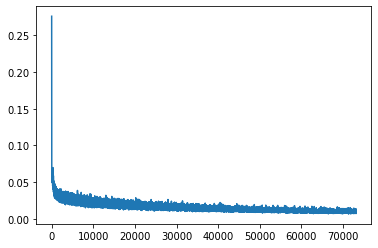

epoch: 40 	 step:0 	 loss: 0.008272
epoch: 40 	 step:100 	 loss: 0.008537
epoch: 40 	 step:200 	 loss: 0.009462
epoch: 40 	 step:300 	 loss: 0.007339
epoch: 40 	 step:400 	 loss: 0.008276
epoch: 40 	 step:500 	 loss: 0.008623
epoch: 40 	 step:600 	 loss: 0.008578
epoch: 40 	 step:700 	 loss: 0.009555
epoch: 40 	 step:800 	 loss: 0.008002
epoch: 40 	 step:900 	 loss: 0.01106
epoch: 40 	 step:1000 	 loss: 0.009967
epoch: 40 	 step:1100 	 loss: 0.01126
epoch: 40 	 step:1200 	 loss: 0.007767
epoch: 40 	 step:1300 	 loss: 0.008099
epoch: 40 	 step:1400 	 loss: 0.007899
epoch: 40 	 step:1500 	 loss: 0.007737
epoch: 40 	 step:1600 	 loss: 0.007982
epoch: 40 	 step:1700 	 loss: 0.009114
epoch: 40 	 step:1800 	 loss: 0.008842


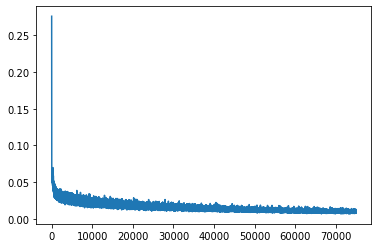

epoch: 41 	 step:0 	 loss: 0.009901
epoch: 41 	 step:100 	 loss: 0.007932
epoch: 41 	 step:200 	 loss: 0.008428
epoch: 41 	 step:300 	 loss: 0.008473
epoch: 41 	 step:400 	 loss: 0.009202
epoch: 41 	 step:500 	 loss: 0.01034
epoch: 41 	 step:600 	 loss: 0.008504
epoch: 41 	 step:700 	 loss: 0.01059
epoch: 41 	 step:800 	 loss: 0.008451
epoch: 41 	 step:900 	 loss: 0.008079
epoch: 41 	 step:1000 	 loss: 0.009724
epoch: 41 	 step:1100 	 loss: 0.008521
epoch: 41 	 step:1200 	 loss: 0.009213
epoch: 41 	 step:1300 	 loss: 0.008785
epoch: 41 	 step:1400 	 loss: 0.008531
epoch: 41 	 step:1500 	 loss: 0.009132
epoch: 41 	 step:1600 	 loss: 0.009792
epoch: 41 	 step:1700 	 loss: 0.009109
epoch: 41 	 step:1800 	 loss: 0.01109


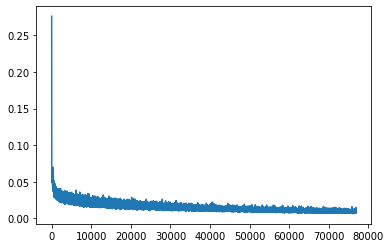

epoch: 42 	 step:0 	 loss: 0.008298
epoch: 42 	 step:100 	 loss: 0.009371
epoch: 42 	 step:200 	 loss: 0.009555
epoch: 42 	 step:300 	 loss: 0.006818
epoch: 42 	 step:400 	 loss: 0.008305
epoch: 42 	 step:500 	 loss: 0.008756
epoch: 42 	 step:600 	 loss: 0.009255
epoch: 42 	 step:700 	 loss: 0.009523
epoch: 42 	 step:800 	 loss: 0.008411
epoch: 42 	 step:900 	 loss: 0.008115
epoch: 42 	 step:1000 	 loss: 0.009253
epoch: 42 	 step:1100 	 loss: 0.01108
epoch: 42 	 step:1200 	 loss: 0.008705
epoch: 42 	 step:1300 	 loss: 0.008654
epoch: 42 	 step:1400 	 loss: 0.009814
epoch: 42 	 step:1500 	 loss: 0.008376
epoch: 42 	 step:1600 	 loss: 0.008488
epoch: 42 	 step:1700 	 loss: 0.009788
epoch: 42 	 step:1800 	 loss: 0.008632


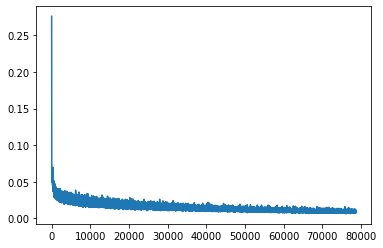

epoch: 43 	 step:0 	 loss: 0.008671
epoch: 43 	 step:100 	 loss: 0.007835
epoch: 43 	 step:200 	 loss: 0.007554
epoch: 43 	 step:300 	 loss: 0.0087
epoch: 43 	 step:400 	 loss: 0.008308
epoch: 43 	 step:500 	 loss: 0.00774
epoch: 43 	 step:600 	 loss: 0.009231
epoch: 43 	 step:700 	 loss: 0.01013
epoch: 43 	 step:800 	 loss: 0.008781
epoch: 43 	 step:900 	 loss: 0.008298
epoch: 43 	 step:1000 	 loss: 0.0101
epoch: 43 	 step:1100 	 loss: 0.008926
epoch: 43 	 step:1200 	 loss: 0.008241
epoch: 43 	 step:1300 	 loss: 0.008485
epoch: 43 	 step:1400 	 loss: 0.009397
epoch: 43 	 step:1500 	 loss: 0.008259
epoch: 43 	 step:1600 	 loss: 0.007204
epoch: 43 	 step:1700 	 loss: 0.008587
epoch: 43 	 step:1800 	 loss: 0.008271


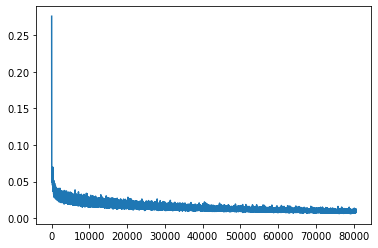

epoch: 44 	 step:0 	 loss: 0.007604
epoch: 44 	 step:100 	 loss: 0.008282
epoch: 44 	 step:200 	 loss: 0.008393
epoch: 44 	 step:300 	 loss: 0.007947
epoch: 44 	 step:400 	 loss: 0.007709
epoch: 44 	 step:500 	 loss: 0.007552
epoch: 44 	 step:600 	 loss: 0.007771
epoch: 44 	 step:700 	 loss: 0.007675
epoch: 44 	 step:800 	 loss: 0.006981
epoch: 44 	 step:900 	 loss: 0.01011
epoch: 44 	 step:1000 	 loss: 0.007883
epoch: 44 	 step:1100 	 loss: 0.007775
epoch: 44 	 step:1200 	 loss: 0.008678
epoch: 44 	 step:1300 	 loss: 0.007523
epoch: 44 	 step:1400 	 loss: 0.007649
epoch: 44 	 step:1500 	 loss: 0.007694
epoch: 44 	 step:1600 	 loss: 0.009001
epoch: 44 	 step:1700 	 loss: 0.008575
epoch: 44 	 step:1800 	 loss: 0.008751


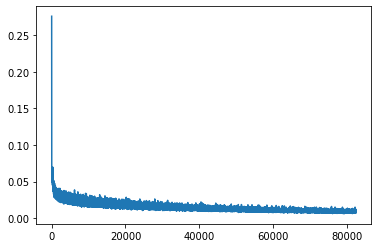

epoch: 45 	 step:0 	 loss: 0.007612
epoch: 45 	 step:100 	 loss: 0.007882
epoch: 45 	 step:200 	 loss: 0.008018
epoch: 45 	 step:300 	 loss: 0.009213
epoch: 45 	 step:400 	 loss: 0.007551
epoch: 45 	 step:500 	 loss: 0.007414
epoch: 45 	 step:600 	 loss: 0.01037
epoch: 45 	 step:700 	 loss: 0.006927
epoch: 45 	 step:800 	 loss: 0.007534
epoch: 45 	 step:900 	 loss: 0.01006
epoch: 45 	 step:1000 	 loss: 0.007667
epoch: 45 	 step:1100 	 loss: 0.007303
epoch: 45 	 step:1200 	 loss: 0.008952
epoch: 45 	 step:1300 	 loss: 0.008574
epoch: 45 	 step:1400 	 loss: 0.008372
epoch: 45 	 step:1500 	 loss: 0.01001
epoch: 45 	 step:1600 	 loss: 0.007736
epoch: 45 	 step:1700 	 loss: 0.008884
epoch: 45 	 step:1800 	 loss: 0.008225


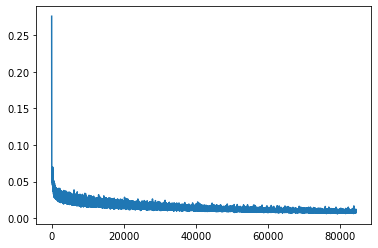

epoch: 46 	 step:0 	 loss: 0.007254
epoch: 46 	 step:100 	 loss: 0.007999
epoch: 46 	 step:200 	 loss: 0.006727
epoch: 46 	 step:300 	 loss: 0.007593
epoch: 46 	 step:400 	 loss: 0.008217
epoch: 46 	 step:500 	 loss: 0.01004
epoch: 46 	 step:600 	 loss: 0.00702
epoch: 46 	 step:700 	 loss: 0.007379
epoch: 46 	 step:800 	 loss: 0.007183
epoch: 46 	 step:900 	 loss: 0.009326
epoch: 46 	 step:1000 	 loss: 0.00779
epoch: 46 	 step:1100 	 loss: 0.008176
epoch: 46 	 step:1200 	 loss: 0.008586
epoch: 46 	 step:1300 	 loss: 0.006925
epoch: 46 	 step:1400 	 loss: 0.008274
epoch: 46 	 step:1500 	 loss: 0.008366
epoch: 46 	 step:1600 	 loss: 0.008756
epoch: 46 	 step:1700 	 loss: 0.006791
epoch: 46 	 step:1800 	 loss: 0.009512


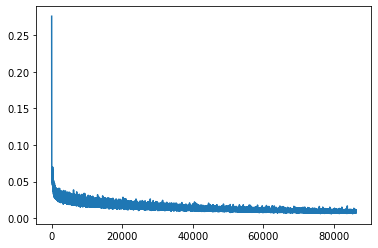

epoch: 47 	 step:0 	 loss: 0.008215
epoch: 47 	 step:100 	 loss: 0.007807
epoch: 47 	 step:200 	 loss: 0.007724
epoch: 47 	 step:300 	 loss: 0.007531
epoch: 47 	 step:400 	 loss: 0.007011
epoch: 47 	 step:500 	 loss: 0.00895
epoch: 47 	 step:600 	 loss: 0.008135
epoch: 47 	 step:700 	 loss: 0.009287
epoch: 47 	 step:800 	 loss: 0.00839
epoch: 47 	 step:900 	 loss: 0.007106
epoch: 47 	 step:1000 	 loss: 0.009799
epoch: 47 	 step:1100 	 loss: 0.009471
epoch: 47 	 step:1200 	 loss: 0.008872
epoch: 47 	 step:1300 	 loss: 0.009244
epoch: 47 	 step:1400 	 loss: 0.008806
epoch: 47 	 step:1500 	 loss: 0.009052
epoch: 47 	 step:1600 	 loss: 0.008546
epoch: 47 	 step:1700 	 loss: 0.007604
epoch: 47 	 step:1800 	 loss: 0.007592


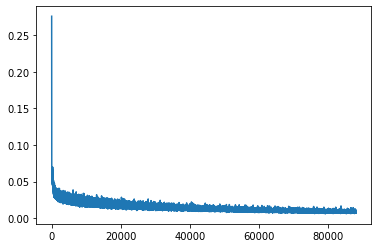

epoch: 48 	 step:0 	 loss: 0.00779
epoch: 48 	 step:100 	 loss: 0.008272
epoch: 48 	 step:200 	 loss: 0.006443
epoch: 48 	 step:300 	 loss: 0.006765
epoch: 48 	 step:400 	 loss: 0.008532
epoch: 48 	 step:500 	 loss: 0.008578
epoch: 48 	 step:600 	 loss: 0.007454
epoch: 48 	 step:700 	 loss: 0.007027
epoch: 48 	 step:800 	 loss: 0.007555
epoch: 48 	 step:900 	 loss: 0.007786
epoch: 48 	 step:1000 	 loss: 0.007574
epoch: 48 	 step:1100 	 loss: 0.008015
epoch: 48 	 step:1200 	 loss: 0.009134
epoch: 48 	 step:1300 	 loss: 0.007032
epoch: 48 	 step:1400 	 loss: 0.008218
epoch: 48 	 step:1500 	 loss: 0.007357
epoch: 48 	 step:1600 	 loss: 0.00802
epoch: 48 	 step:1700 	 loss: 0.008656
epoch: 48 	 step:1800 	 loss: 0.007643


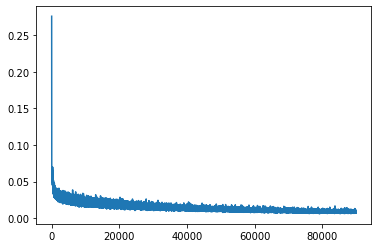

epoch: 49 	 step:0 	 loss: 0.007241
epoch: 49 	 step:100 	 loss: 0.007287
epoch: 49 	 step:200 	 loss: 0.009328
epoch: 49 	 step:300 	 loss: 0.006555
epoch: 49 	 step:400 	 loss: 0.009266
epoch: 49 	 step:500 	 loss: 0.01027
epoch: 49 	 step:600 	 loss: 0.008113
epoch: 49 	 step:700 	 loss: 0.008453
epoch: 49 	 step:800 	 loss: 0.008214
epoch: 49 	 step:900 	 loss: 0.007599
epoch: 49 	 step:1000 	 loss: 0.007144
epoch: 49 	 step:1100 	 loss: 0.009003
epoch: 49 	 step:1200 	 loss: 0.006085
epoch: 49 	 step:1300 	 loss: 0.008272
epoch: 49 	 step:1400 	 loss: 0.007677
epoch: 49 	 step:1500 	 loss: 0.008954
epoch: 49 	 step:1600 	 loss: 0.008822
epoch: 49 	 step:1700 	 loss: 0.008198
epoch: 49 	 step:1800 	 loss: 0.008215


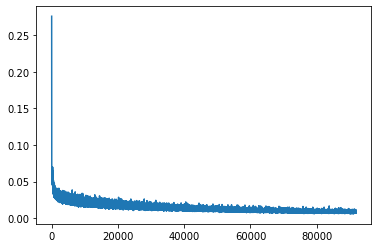

epoch: 50 	 step:0 	 loss: 0.009164
epoch: 50 	 step:100 	 loss: 0.007043
epoch: 50 	 step:200 	 loss: 0.007117
epoch: 50 	 step:300 	 loss: 0.009092
epoch: 50 	 step:400 	 loss: 0.007606
epoch: 50 	 step:500 	 loss: 0.007541
epoch: 50 	 step:600 	 loss: 0.008955
epoch: 50 	 step:700 	 loss: 0.007594
epoch: 50 	 step:800 	 loss: 0.008312
epoch: 50 	 step:900 	 loss: 0.007674
epoch: 50 	 step:1000 	 loss: 0.007331
epoch: 50 	 step:1100 	 loss: 0.006312
epoch: 50 	 step:1200 	 loss: 0.007942
epoch: 50 	 step:1300 	 loss: 0.008473
epoch: 50 	 step:1400 	 loss: 0.007564
epoch: 50 	 step:1500 	 loss: 0.008007
epoch: 50 	 step:1600 	 loss: 0.007846
epoch: 50 	 step:1700 	 loss: 0.007402
epoch: 50 	 step:1800 	 loss: 0.008727


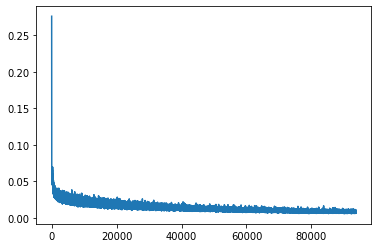

epoch: 51 	 step:0 	 loss: 0.008837
epoch: 51 	 step:100 	 loss: 0.008622
epoch: 51 	 step:200 	 loss: 0.007997
epoch: 51 	 step:300 	 loss: 0.007268
epoch: 51 	 step:400 	 loss: 0.006834
epoch: 51 	 step:500 	 loss: 0.007812
epoch: 51 	 step:600 	 loss: 0.007573
epoch: 51 	 step:700 	 loss: 0.008114
epoch: 51 	 step:800 	 loss: 0.009048
epoch: 51 	 step:900 	 loss: 0.008708
epoch: 51 	 step:1000 	 loss: 0.006936
epoch: 51 	 step:1100 	 loss: 0.008637
epoch: 51 	 step:1200 	 loss: 0.006908
epoch: 51 	 step:1300 	 loss: 0.008317
epoch: 51 	 step:1400 	 loss: 0.007496
epoch: 51 	 step:1500 	 loss: 0.006669
epoch: 51 	 step:1600 	 loss: 0.007893
epoch: 51 	 step:1700 	 loss: 0.00917
epoch: 51 	 step:1800 	 loss: 0.008924


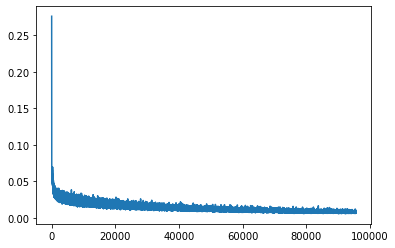

epoch: 52 	 step:0 	 loss: 0.007298
epoch: 52 	 step:100 	 loss: 0.006883
epoch: 52 	 step:200 	 loss: 0.007848
epoch: 52 	 step:300 	 loss: 0.007393
epoch: 52 	 step:400 	 loss: 0.007515
epoch: 52 	 step:500 	 loss: 0.007991
epoch: 52 	 step:600 	 loss: 0.006855
epoch: 52 	 step:700 	 loss: 0.00786
epoch: 52 	 step:800 	 loss: 0.007222
epoch: 52 	 step:900 	 loss: 0.007257
epoch: 52 	 step:1000 	 loss: 0.007387
epoch: 52 	 step:1100 	 loss: 0.008775
epoch: 52 	 step:1200 	 loss: 0.008392
epoch: 52 	 step:1300 	 loss: 0.008942
epoch: 52 	 step:1400 	 loss: 0.007291
epoch: 52 	 step:1500 	 loss: 0.007403
epoch: 52 	 step:1600 	 loss: 0.007084
epoch: 52 	 step:1700 	 loss: 0.009067
epoch: 52 	 step:1800 	 loss: 0.007615


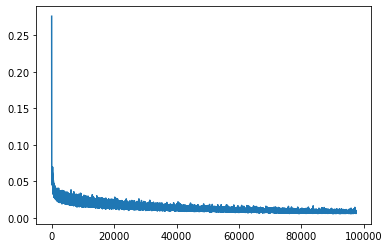

epoch: 53 	 step:0 	 loss: 0.006692
epoch: 53 	 step:100 	 loss: 0.007984
epoch: 53 	 step:200 	 loss: 0.007828
epoch: 53 	 step:300 	 loss: 0.007994
epoch: 53 	 step:400 	 loss: 0.007798
epoch: 53 	 step:500 	 loss: 0.008144
epoch: 53 	 step:600 	 loss: 0.008093
epoch: 53 	 step:700 	 loss: 0.007318
epoch: 53 	 step:800 	 loss: 0.006676
epoch: 53 	 step:900 	 loss: 0.006352
epoch: 53 	 step:1000 	 loss: 0.00787
epoch: 53 	 step:1100 	 loss: 0.008763
epoch: 53 	 step:1200 	 loss: 0.008232
epoch: 53 	 step:1300 	 loss: 0.007548
epoch: 53 	 step:1400 	 loss: 0.00664
epoch: 53 	 step:1500 	 loss: 0.00761
epoch: 53 	 step:1600 	 loss: 0.006775
epoch: 53 	 step:1700 	 loss: 0.00789
epoch: 53 	 step:1800 	 loss: 0.007427


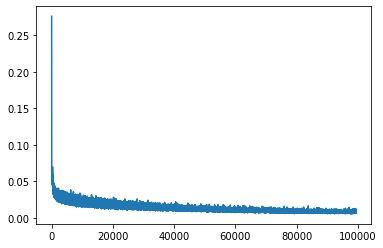

epoch: 54 	 step:0 	 loss: 0.006336
epoch: 54 	 step:100 	 loss: 0.007137
epoch: 54 	 step:200 	 loss: 0.006665
epoch: 54 	 step:300 	 loss: 0.007007
epoch: 54 	 step:400 	 loss: 0.006199
epoch: 54 	 step:500 	 loss: 0.007434
epoch: 54 	 step:600 	 loss: 0.007709
epoch: 54 	 step:700 	 loss: 0.007917
epoch: 54 	 step:800 	 loss: 0.008474
epoch: 54 	 step:900 	 loss: 0.007314
epoch: 54 	 step:1000 	 loss: 0.008971
epoch: 54 	 step:1100 	 loss: 0.007374
epoch: 54 	 step:1200 	 loss: 0.007563
epoch: 54 	 step:1300 	 loss: 0.006978
epoch: 54 	 step:1400 	 loss: 0.007207
epoch: 54 	 step:1500 	 loss: 0.006879
epoch: 54 	 step:1600 	 loss: 0.007224
epoch: 54 	 step:1700 	 loss: 0.008139
epoch: 54 	 step:1800 	 loss: 0.007797


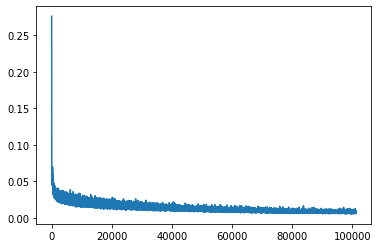

epoch: 55 	 step:0 	 loss: 0.007937
epoch: 55 	 step:100 	 loss: 0.007003
epoch: 55 	 step:200 	 loss: 0.007969
epoch: 55 	 step:300 	 loss: 0.006916
epoch: 55 	 step:400 	 loss: 0.007352
epoch: 55 	 step:500 	 loss: 0.006774
epoch: 55 	 step:600 	 loss: 0.007677
epoch: 55 	 step:700 	 loss: 0.006934
epoch: 55 	 step:800 	 loss: 0.007283
epoch: 55 	 step:900 	 loss: 0.007072
epoch: 55 	 step:1000 	 loss: 0.00763
epoch: 55 	 step:1100 	 loss: 0.007239
epoch: 55 	 step:1200 	 loss: 0.007838
epoch: 55 	 step:1300 	 loss: 0.00676
epoch: 55 	 step:1400 	 loss: 0.006845
epoch: 55 	 step:1500 	 loss: 0.007448
epoch: 55 	 step:1600 	 loss: 0.006462
epoch: 55 	 step:1700 	 loss: 0.00759
epoch: 55 	 step:1800 	 loss: 0.006561


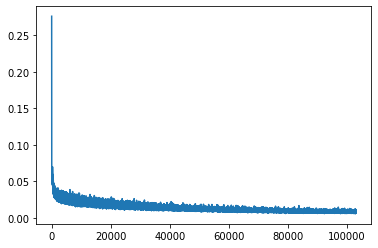

epoch: 56 	 step:0 	 loss: 0.008268
epoch: 56 	 step:100 	 loss: 0.006871
epoch: 56 	 step:200 	 loss: 0.007548
epoch: 56 	 step:300 	 loss: 0.007716
epoch: 56 	 step:400 	 loss: 0.008874
epoch: 56 	 step:500 	 loss: 0.00663
epoch: 56 	 step:600 	 loss: 0.007171
epoch: 56 	 step:700 	 loss: 0.006749
epoch: 56 	 step:800 	 loss: 0.006973
epoch: 56 	 step:900 	 loss: 0.007499
epoch: 56 	 step:1000 	 loss: 0.006595
epoch: 56 	 step:1100 	 loss: 0.007909
epoch: 56 	 step:1200 	 loss: 0.007165
epoch: 56 	 step:1300 	 loss: 0.006607
epoch: 56 	 step:1400 	 loss: 0.007695
epoch: 56 	 step:1500 	 loss: 0.006836
epoch: 56 	 step:1600 	 loss: 0.00722
epoch: 56 	 step:1700 	 loss: 0.007862
epoch: 56 	 step:1800 	 loss: 0.007066


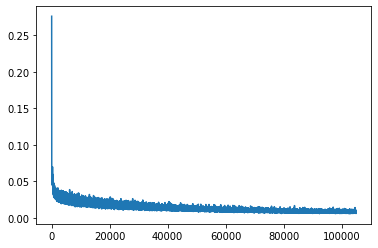

epoch: 57 	 step:0 	 loss: 0.007451
epoch: 57 	 step:100 	 loss: 0.007598
epoch: 57 	 step:200 	 loss: 0.006714
epoch: 57 	 step:300 	 loss: 0.008351
epoch: 57 	 step:400 	 loss: 0.007319
epoch: 57 	 step:500 	 loss: 0.006656
epoch: 57 	 step:600 	 loss: 0.007237
epoch: 57 	 step:700 	 loss: 0.008288
epoch: 57 	 step:800 	 loss: 0.007139
epoch: 57 	 step:900 	 loss: 0.007746
epoch: 57 	 step:1000 	 loss: 0.007741
epoch: 57 	 step:1100 	 loss: 0.007481
epoch: 57 	 step:1200 	 loss: 0.00773
epoch: 57 	 step:1300 	 loss: 0.00753
epoch: 57 	 step:1400 	 loss: 0.006952
epoch: 57 	 step:1500 	 loss: 0.008052
epoch: 57 	 step:1600 	 loss: 0.007851
epoch: 57 	 step:1700 	 loss: 0.007411
epoch: 57 	 step:1800 	 loss: 0.007657


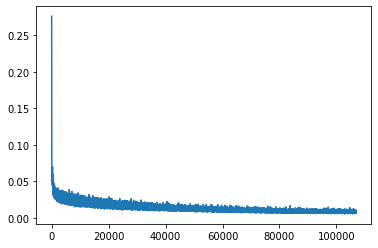

epoch: 58 	 step:0 	 loss: 0.0071
epoch: 58 	 step:100 	 loss: 0.006562
epoch: 58 	 step:200 	 loss: 0.00666
epoch: 58 	 step:300 	 loss: 0.007389
epoch: 58 	 step:400 	 loss: 0.008779
epoch: 58 	 step:500 	 loss: 0.006347
epoch: 58 	 step:600 	 loss: 0.00735
epoch: 58 	 step:700 	 loss: 0.007862
epoch: 58 	 step:800 	 loss: 0.007938
epoch: 58 	 step:900 	 loss: 0.007561
epoch: 58 	 step:1000 	 loss: 0.007582
epoch: 58 	 step:1100 	 loss: 0.008641
epoch: 58 	 step:1200 	 loss: 0.008039
epoch: 58 	 step:1300 	 loss: 0.006701
epoch: 58 	 step:1400 	 loss: 0.007039
epoch: 58 	 step:1500 	 loss: 0.006602
epoch: 58 	 step:1600 	 loss: 0.007941
epoch: 58 	 step:1700 	 loss: 0.006615
epoch: 58 	 step:1800 	 loss: 0.007758


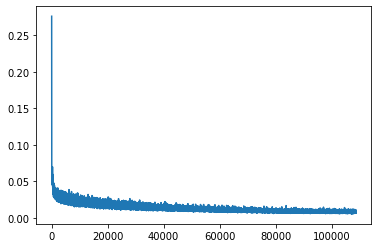

epoch: 59 	 step:0 	 loss: 0.007883
epoch: 59 	 step:100 	 loss: 0.007442
epoch: 59 	 step:200 	 loss: 0.006809
epoch: 59 	 step:300 	 loss: 0.007376
epoch: 59 	 step:400 	 loss: 0.007053
epoch: 59 	 step:500 	 loss: 0.007697
epoch: 59 	 step:600 	 loss: 0.006273
epoch: 59 	 step:700 	 loss: 0.008894
epoch: 59 	 step:800 	 loss: 0.00744
epoch: 59 	 step:900 	 loss: 0.008213
epoch: 59 	 step:1000 	 loss: 0.007321
epoch: 59 	 step:1100 	 loss: 0.00686
epoch: 59 	 step:1200 	 loss: 0.01093
epoch: 59 	 step:1300 	 loss: 0.006828
epoch: 59 	 step:1400 	 loss: 0.008055
epoch: 59 	 step:1500 	 loss: 0.007406
epoch: 59 	 step:1600 	 loss: 0.007489
epoch: 59 	 step:1700 	 loss: 0.007509
epoch: 59 	 step:1800 	 loss: 0.008325


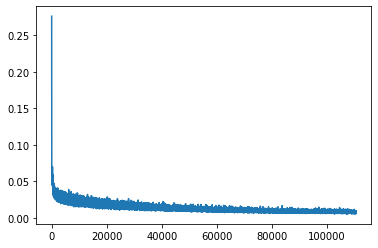

epoch: 60 	 step:0 	 loss: 0.006416
epoch: 60 	 step:100 	 loss: 0.007883
epoch: 60 	 step:200 	 loss: 0.006907
epoch: 60 	 step:300 	 loss: 0.007605
epoch: 60 	 step:400 	 loss: 0.007759
epoch: 60 	 step:500 	 loss: 0.007113
epoch: 60 	 step:600 	 loss: 0.007211
epoch: 60 	 step:700 	 loss: 0.007146
epoch: 60 	 step:800 	 loss: 0.006963
epoch: 60 	 step:900 	 loss: 0.007282
epoch: 60 	 step:1000 	 loss: 0.008867
epoch: 60 	 step:1100 	 loss: 0.007145
epoch: 60 	 step:1200 	 loss: 0.006827
epoch: 60 	 step:1300 	 loss: 0.008084
epoch: 60 	 step:1400 	 loss: 0.007378
epoch: 60 	 step:1500 	 loss: 0.006212
epoch: 60 	 step:1600 	 loss: 0.007976
epoch: 60 	 step:1700 	 loss: 0.006866
epoch: 60 	 step:1800 	 loss: 0.00695


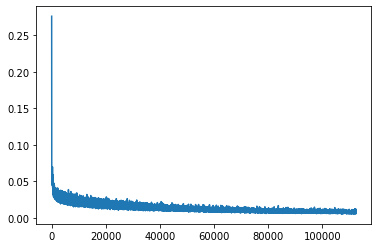

epoch: 61 	 step:0 	 loss: 0.007498
epoch: 61 	 step:100 	 loss: 0.006618
epoch: 61 	 step:200 	 loss: 0.007429
epoch: 61 	 step:300 	 loss: 0.00704
epoch: 61 	 step:400 	 loss: 0.006611
epoch: 61 	 step:500 	 loss: 0.006246
epoch: 61 	 step:600 	 loss: 0.007157
epoch: 61 	 step:700 	 loss: 0.007069
epoch: 61 	 step:800 	 loss: 0.00722
epoch: 61 	 step:900 	 loss: 0.006983
epoch: 61 	 step:1000 	 loss: 0.008282
epoch: 61 	 step:1100 	 loss: 0.006184
epoch: 61 	 step:1200 	 loss: 0.00606
epoch: 61 	 step:1300 	 loss: 0.006428
epoch: 61 	 step:1400 	 loss: 0.006291
epoch: 61 	 step:1500 	 loss: 0.007804
epoch: 61 	 step:1600 	 loss: 0.006988
epoch: 61 	 step:1700 	 loss: 0.006497
epoch: 61 	 step:1800 	 loss: 0.006083


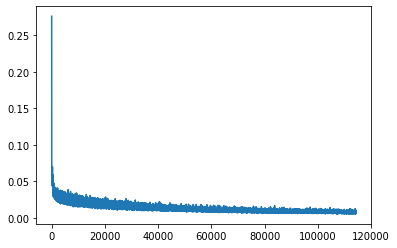

epoch: 62 	 step:0 	 loss: 0.006653
epoch: 62 	 step:100 	 loss: 0.00674
epoch: 62 	 step:200 	 loss: 0.005907
epoch: 62 	 step:300 	 loss: 0.007388
epoch: 62 	 step:400 	 loss: 0.006855
epoch: 62 	 step:500 	 loss: 0.007147
epoch: 62 	 step:600 	 loss: 0.006467
epoch: 62 	 step:700 	 loss: 0.007788
epoch: 62 	 step:800 	 loss: 0.006992
epoch: 62 	 step:900 	 loss: 0.006405
epoch: 62 	 step:1000 	 loss: 0.006933
epoch: 62 	 step:1100 	 loss: 0.006624
epoch: 62 	 step:1200 	 loss: 0.006863
epoch: 62 	 step:1300 	 loss: 0.006874
epoch: 62 	 step:1400 	 loss: 0.007199
epoch: 62 	 step:1500 	 loss: 0.006307
epoch: 62 	 step:1600 	 loss: 0.00714
epoch: 62 	 step:1700 	 loss: 0.01112
epoch: 62 	 step:1800 	 loss: 0.006393


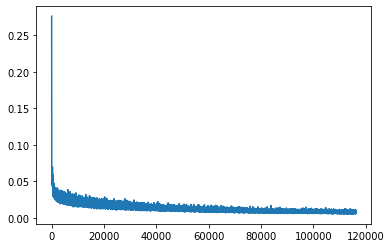

epoch: 63 	 step:0 	 loss: 0.006808
epoch: 63 	 step:100 	 loss: 0.006238
epoch: 63 	 step:200 	 loss: 0.006858
epoch: 63 	 step:300 	 loss: 0.006605
epoch: 63 	 step:400 	 loss: 0.006888
epoch: 63 	 step:500 	 loss: 0.00747
epoch: 63 	 step:600 	 loss: 0.006822
epoch: 63 	 step:700 	 loss: 0.006964
epoch: 63 	 step:800 	 loss: 0.006523
epoch: 63 	 step:900 	 loss: 0.007979
epoch: 63 	 step:1000 	 loss: 0.006368
epoch: 63 	 step:1100 	 loss: 0.006391
epoch: 63 	 step:1200 	 loss: 0.006813
epoch: 63 	 step:1300 	 loss: 0.007468
epoch: 63 	 step:1400 	 loss: 0.007191
epoch: 63 	 step:1500 	 loss: 0.006897
epoch: 63 	 step:1600 	 loss: 0.00662
epoch: 63 	 step:1700 	 loss: 0.005917
epoch: 63 	 step:1800 	 loss: 0.007789


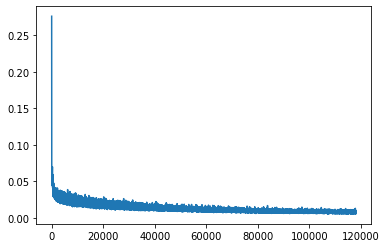

epoch: 64 	 step:0 	 loss: 0.006455
epoch: 64 	 step:100 	 loss: 0.00698
epoch: 64 	 step:200 	 loss: 0.006065
epoch: 64 	 step:300 	 loss: 0.006196
epoch: 64 	 step:400 	 loss: 0.006188
epoch: 64 	 step:500 	 loss: 0.007991
epoch: 64 	 step:600 	 loss: 0.00678
epoch: 64 	 step:700 	 loss: 0.007189
epoch: 64 	 step:800 	 loss: 0.006722
epoch: 64 	 step:900 	 loss: 0.006773
epoch: 64 	 step:1000 	 loss: 0.006549
epoch: 64 	 step:1100 	 loss: 0.006507
epoch: 64 	 step:1200 	 loss: 0.006566
epoch: 64 	 step:1300 	 loss: 0.00683
epoch: 64 	 step:1400 	 loss: 0.007035
epoch: 64 	 step:1500 	 loss: 0.00688
epoch: 64 	 step:1600 	 loss: 0.007268
epoch: 64 	 step:1700 	 loss: 0.00798
epoch: 64 	 step:1800 	 loss: 0.007027


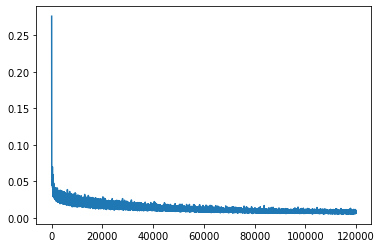

epoch: 65 	 step:0 	 loss: 0.006203
epoch: 65 	 step:100 	 loss: 0.007729
epoch: 65 	 step:200 	 loss: 0.007229
epoch: 65 	 step:300 	 loss: 0.005987
epoch: 65 	 step:400 	 loss: 0.006158
epoch: 65 	 step:500 	 loss: 0.006676
epoch: 65 	 step:600 	 loss: 0.009587
epoch: 65 	 step:700 	 loss: 0.006499
epoch: 65 	 step:800 	 loss: 0.007977
epoch: 65 	 step:900 	 loss: 0.00679
epoch: 65 	 step:1000 	 loss: 0.006371
epoch: 65 	 step:1100 	 loss: 0.00704
epoch: 65 	 step:1200 	 loss: 0.006841
epoch: 65 	 step:1300 	 loss: 0.006948
epoch: 65 	 step:1400 	 loss: 0.007409
epoch: 65 	 step:1500 	 loss: 0.008319
epoch: 65 	 step:1600 	 loss: 0.005755
epoch: 65 	 step:1700 	 loss: 0.006602
epoch: 65 	 step:1800 	 loss: 0.005847


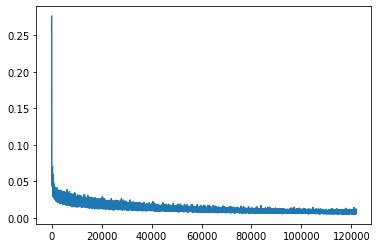

epoch: 66 	 step:0 	 loss: 0.007366
epoch: 66 	 step:100 	 loss: 0.006886
epoch: 66 	 step:200 	 loss: 0.006014
epoch: 66 	 step:300 	 loss: 0.00602
epoch: 66 	 step:400 	 loss: 0.006105
epoch: 66 	 step:500 	 loss: 0.006907
epoch: 66 	 step:600 	 loss: 0.007046
epoch: 66 	 step:700 	 loss: 0.006904
epoch: 66 	 step:800 	 loss: 0.007504
epoch: 66 	 step:900 	 loss: 0.006113
epoch: 66 	 step:1000 	 loss: 0.006604
epoch: 66 	 step:1100 	 loss: 0.007952
epoch: 66 	 step:1200 	 loss: 0.005918
epoch: 66 	 step:1300 	 loss: 0.00762
epoch: 66 	 step:1400 	 loss: 0.007588
epoch: 66 	 step:1500 	 loss: 0.006771
epoch: 66 	 step:1600 	 loss: 0.006282
epoch: 66 	 step:1700 	 loss: 0.007128
epoch: 66 	 step:1800 	 loss: 0.006041


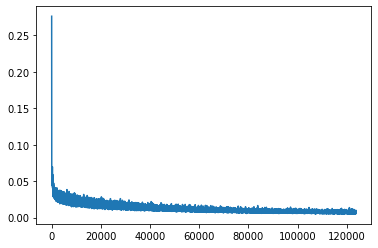

epoch: 67 	 step:0 	 loss: 0.006376
epoch: 67 	 step:100 	 loss: 0.006346
epoch: 67 	 step:200 	 loss: 0.006066
epoch: 67 	 step:300 	 loss: 0.006257
epoch: 67 	 step:400 	 loss: 0.007832
epoch: 67 	 step:500 	 loss: 0.006637
epoch: 67 	 step:600 	 loss: 0.007348
epoch: 67 	 step:700 	 loss: 0.007334
epoch: 67 	 step:800 	 loss: 0.007041
epoch: 67 	 step:900 	 loss: 0.006612
epoch: 67 	 step:1000 	 loss: 0.007246
epoch: 67 	 step:1100 	 loss: 0.007639
epoch: 67 	 step:1200 	 loss: 0.006079
epoch: 67 	 step:1300 	 loss: 0.007001
epoch: 67 	 step:1400 	 loss: 0.006501
epoch: 67 	 step:1500 	 loss: 0.007242
epoch: 67 	 step:1600 	 loss: 0.007149
epoch: 67 	 step:1700 	 loss: 0.006502
epoch: 67 	 step:1800 	 loss: 0.006508


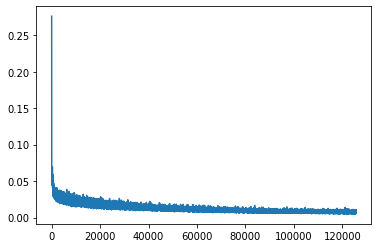

epoch: 68 	 step:0 	 loss: 0.006215
epoch: 68 	 step:100 	 loss: 0.006156
epoch: 68 	 step:200 	 loss: 0.007227
epoch: 68 	 step:300 	 loss: 0.007485
epoch: 68 	 step:400 	 loss: 0.006075
epoch: 68 	 step:500 	 loss: 0.007971
epoch: 68 	 step:600 	 loss: 0.007306
epoch: 68 	 step:700 	 loss: 0.006966
epoch: 68 	 step:800 	 loss: 0.006364
epoch: 68 	 step:900 	 loss: 0.007224
epoch: 68 	 step:1000 	 loss: 0.006578
epoch: 68 	 step:1100 	 loss: 0.006086
epoch: 68 	 step:1200 	 loss: 0.00666
epoch: 68 	 step:1300 	 loss: 0.007116
epoch: 68 	 step:1400 	 loss: 0.006223
epoch: 68 	 step:1500 	 loss: 0.007226
epoch: 68 	 step:1600 	 loss: 0.007627
epoch: 68 	 step:1700 	 loss: 0.007058
epoch: 68 	 step:1800 	 loss: 0.009351


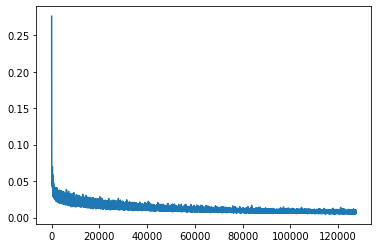

epoch: 69 	 step:0 	 loss: 0.006601
epoch: 69 	 step:100 	 loss: 0.007311
epoch: 69 	 step:200 	 loss: 0.006506
epoch: 69 	 step:300 	 loss: 0.006805
epoch: 69 	 step:400 	 loss: 0.005878
epoch: 69 	 step:500 	 loss: 0.006384
epoch: 69 	 step:600 	 loss: 0.006013
epoch: 69 	 step:700 	 loss: 0.006656
epoch: 69 	 step:800 	 loss: 0.006659
epoch: 69 	 step:900 	 loss: 0.006218
epoch: 69 	 step:1000 	 loss: 0.007348
epoch: 69 	 step:1100 	 loss: 0.008275
epoch: 69 	 step:1200 	 loss: 0.007603
epoch: 69 	 step:1300 	 loss: 0.006213
epoch: 69 	 step:1400 	 loss: 0.006298
epoch: 69 	 step:1500 	 loss: 0.006341
epoch: 69 	 step:1600 	 loss: 0.006603
epoch: 69 	 step:1700 	 loss: 0.007855
epoch: 69 	 step:1800 	 loss: 0.006209


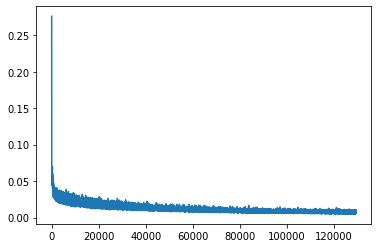

epoch: 70 	 step:0 	 loss: 0.007169
epoch: 70 	 step:100 	 loss: 0.005615
epoch: 70 	 step:200 	 loss: 0.006639
epoch: 70 	 step:300 	 loss: 0.005604
epoch: 70 	 step:400 	 loss: 0.006038
epoch: 70 	 step:500 	 loss: 0.006304
epoch: 70 	 step:600 	 loss: 0.006018
epoch: 70 	 step:700 	 loss: 0.006193
epoch: 70 	 step:800 	 loss: 0.005963
epoch: 70 	 step:900 	 loss: 0.007447
epoch: 70 	 step:1000 	 loss: 0.007348
epoch: 70 	 step:1100 	 loss: 0.006203
epoch: 70 	 step:1200 	 loss: 0.00724
epoch: 70 	 step:1300 	 loss: 0.006324
epoch: 70 	 step:1400 	 loss: 0.005669
epoch: 70 	 step:1500 	 loss: 0.006022
epoch: 70 	 step:1600 	 loss: 0.006947
epoch: 70 	 step:1700 	 loss: 0.006371
epoch: 70 	 step:1800 	 loss: 0.00605


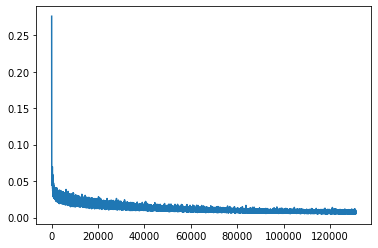

epoch: 71 	 step:0 	 loss: 0.005677
epoch: 71 	 step:100 	 loss: 0.006117
epoch: 71 	 step:200 	 loss: 0.006838
epoch: 71 	 step:300 	 loss: 0.006257
epoch: 71 	 step:400 	 loss: 0.006417
epoch: 71 	 step:500 	 loss: 0.006242
epoch: 71 	 step:600 	 loss: 0.006129
epoch: 71 	 step:700 	 loss: 0.006779
epoch: 71 	 step:800 	 loss: 0.007327
epoch: 71 	 step:900 	 loss: 0.006116
epoch: 71 	 step:1000 	 loss: 0.006162
epoch: 71 	 step:1100 	 loss: 0.006001
epoch: 71 	 step:1200 	 loss: 0.007896
epoch: 71 	 step:1300 	 loss: 0.006344
epoch: 71 	 step:1400 	 loss: 0.006322
epoch: 71 	 step:1500 	 loss: 0.007806
epoch: 71 	 step:1600 	 loss: 0.006159
epoch: 71 	 step:1700 	 loss: 0.007182
epoch: 71 	 step:1800 	 loss: 0.006913


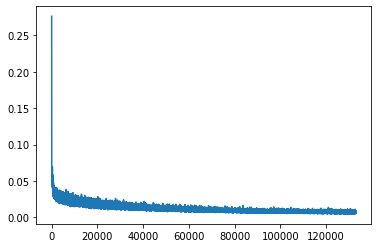

epoch: 72 	 step:0 	 loss: 0.006687
epoch: 72 	 step:100 	 loss: 0.00675
epoch: 72 	 step:200 	 loss: 0.006542
epoch: 72 	 step:300 	 loss: 0.006298
epoch: 72 	 step:400 	 loss: 0.006129
epoch: 72 	 step:500 	 loss: 0.006583
epoch: 72 	 step:600 	 loss: 0.006341
epoch: 72 	 step:700 	 loss: 0.005959
epoch: 72 	 step:800 	 loss: 0.006224
epoch: 72 	 step:900 	 loss: 0.006462
epoch: 72 	 step:1000 	 loss: 0.007754
epoch: 72 	 step:1100 	 loss: 0.006124
epoch: 72 	 step:1200 	 loss: 0.007698
epoch: 72 	 step:1300 	 loss: 0.006157
epoch: 72 	 step:1400 	 loss: 0.006318
epoch: 72 	 step:1500 	 loss: 0.006078
epoch: 72 	 step:1600 	 loss: 0.00595
epoch: 72 	 step:1700 	 loss: 0.006534
epoch: 72 	 step:1800 	 loss: 0.007787


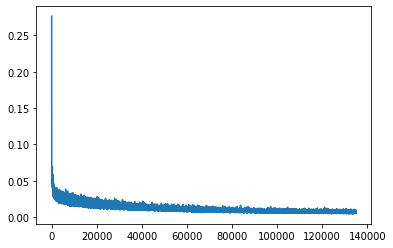

epoch: 73 	 step:0 	 loss: 0.005935
epoch: 73 	 step:100 	 loss: 0.005677
epoch: 73 	 step:200 	 loss: 0.007181
epoch: 73 	 step:300 	 loss: 0.006414
epoch: 73 	 step:400 	 loss: 0.006165
epoch: 73 	 step:500 	 loss: 0.006313
epoch: 73 	 step:600 	 loss: 0.00649
epoch: 73 	 step:700 	 loss: 0.006309
epoch: 73 	 step:800 	 loss: 0.006248
epoch: 73 	 step:900 	 loss: 0.005951
epoch: 73 	 step:1000 	 loss: 0.005613
epoch: 73 	 step:1100 	 loss: 0.007467
epoch: 73 	 step:1200 	 loss: 0.006058
epoch: 73 	 step:1300 	 loss: 0.005633
epoch: 73 	 step:1400 	 loss: 0.00573
epoch: 73 	 step:1500 	 loss: 0.007939
epoch: 73 	 step:1600 	 loss: 0.007793
epoch: 73 	 step:1700 	 loss: 0.006703
epoch: 73 	 step:1800 	 loss: 0.005923


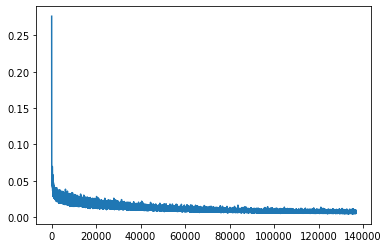

epoch: 74 	 step:0 	 loss: 0.005733
epoch: 74 	 step:100 	 loss: 0.006717
epoch: 74 	 step:200 	 loss: 0.005707
epoch: 74 	 step:300 	 loss: 0.005828
epoch: 74 	 step:400 	 loss: 0.006545
epoch: 74 	 step:500 	 loss: 0.005939
epoch: 74 	 step:600 	 loss: 0.00747
epoch: 74 	 step:700 	 loss: 0.005445
epoch: 74 	 step:800 	 loss: 0.006409
epoch: 74 	 step:900 	 loss: 0.005598
epoch: 74 	 step:1000 	 loss: 0.00608
epoch: 74 	 step:1100 	 loss: 0.006242
epoch: 74 	 step:1200 	 loss: 0.007867
epoch: 74 	 step:1300 	 loss: 0.00693
epoch: 74 	 step:1400 	 loss: 0.006519
epoch: 74 	 step:1500 	 loss: 0.006133
epoch: 74 	 step:1600 	 loss: 0.006257
epoch: 74 	 step:1700 	 loss: 0.008968
epoch: 74 	 step:1800 	 loss: 0.005683


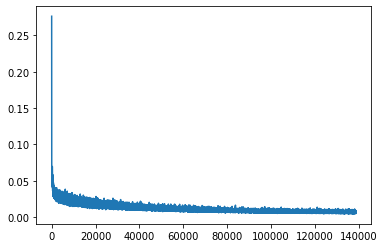

epoch: 75 	 step:0 	 loss: 0.006222
epoch: 75 	 step:100 	 loss: 0.008567
epoch: 75 	 step:200 	 loss: 0.005854
epoch: 75 	 step:300 	 loss: 0.006326
epoch: 75 	 step:400 	 loss: 0.005886
epoch: 75 	 step:500 	 loss: 0.006166
epoch: 75 	 step:600 	 loss: 0.005462
epoch: 75 	 step:700 	 loss: 0.006475
epoch: 75 	 step:800 	 loss: 0.00539
epoch: 75 	 step:900 	 loss: 0.007012
epoch: 75 	 step:1000 	 loss: 0.005591
epoch: 75 	 step:1100 	 loss: 0.005146
epoch: 75 	 step:1200 	 loss: 0.005755
epoch: 75 	 step:1300 	 loss: 0.005668
epoch: 75 	 step:1400 	 loss: 0.006734
epoch: 75 	 step:1500 	 loss: 0.006163
epoch: 75 	 step:1600 	 loss: 0.006399
epoch: 75 	 step:1700 	 loss: 0.00678
epoch: 75 	 step:1800 	 loss: 0.006099


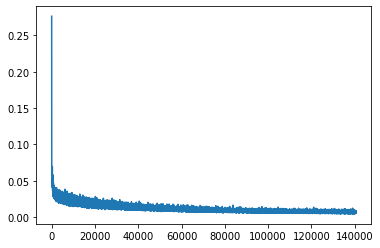

epoch: 76 	 step:0 	 loss: 0.005995
epoch: 76 	 step:100 	 loss: 0.005471
epoch: 76 	 step:200 	 loss: 0.005909
epoch: 76 	 step:300 	 loss: 0.00555
epoch: 76 	 step:400 	 loss: 0.00554
epoch: 76 	 step:500 	 loss: 0.006042
epoch: 76 	 step:600 	 loss: 0.00637
epoch: 76 	 step:700 	 loss: 0.006436
epoch: 76 	 step:800 	 loss: 0.006263
epoch: 76 	 step:900 	 loss: 0.005891
epoch: 76 	 step:1000 	 loss: 0.006212
epoch: 76 	 step:1100 	 loss: 0.006702
epoch: 76 	 step:1200 	 loss: 0.006874
epoch: 76 	 step:1300 	 loss: 0.005962
epoch: 76 	 step:1400 	 loss: 0.006174
epoch: 76 	 step:1500 	 loss: 0.006264
epoch: 76 	 step:1600 	 loss: 0.006269
epoch: 76 	 step:1700 	 loss: 0.00623
epoch: 76 	 step:1800 	 loss: 0.008606


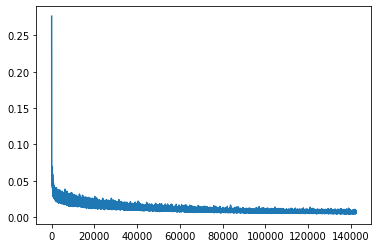

epoch: 77 	 step:0 	 loss: 0.004884
epoch: 77 	 step:100 	 loss: 0.005796
epoch: 77 	 step:200 	 loss: 0.006269
epoch: 77 	 step:300 	 loss: 0.00574
epoch: 77 	 step:400 	 loss: 0.007364
epoch: 77 	 step:500 	 loss: 0.005631
epoch: 77 	 step:600 	 loss: 0.005595
epoch: 77 	 step:700 	 loss: 0.006471
epoch: 77 	 step:800 	 loss: 0.006038
epoch: 77 	 step:900 	 loss: 0.005882
epoch: 77 	 step:1000 	 loss: 0.00666
epoch: 77 	 step:1100 	 loss: 0.006604
epoch: 77 	 step:1200 	 loss: 0.006169
epoch: 77 	 step:1300 	 loss: 0.006869
epoch: 77 	 step:1400 	 loss: 0.006929
epoch: 77 	 step:1500 	 loss: 0.007206
epoch: 77 	 step:1600 	 loss: 0.006389
epoch: 77 	 step:1700 	 loss: 0.006567
epoch: 77 	 step:1800 	 loss: 0.005369


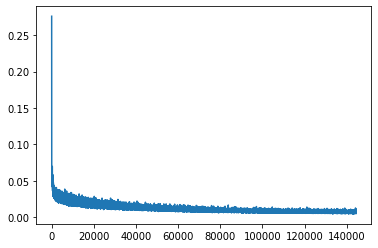

epoch: 78 	 step:0 	 loss: 0.00656
epoch: 78 	 step:100 	 loss: 0.005787
epoch: 78 	 step:200 	 loss: 0.006127
epoch: 78 	 step:300 	 loss: 0.007607
epoch: 78 	 step:400 	 loss: 0.006337
epoch: 78 	 step:500 	 loss: 0.006463
epoch: 78 	 step:600 	 loss: 0.00564
epoch: 78 	 step:700 	 loss: 0.006518
epoch: 78 	 step:800 	 loss: 0.005957
epoch: 78 	 step:900 	 loss: 0.006142
epoch: 78 	 step:1000 	 loss: 0.005402
epoch: 78 	 step:1100 	 loss: 0.006076
epoch: 78 	 step:1200 	 loss: 0.005746
epoch: 78 	 step:1300 	 loss: 0.006708
epoch: 78 	 step:1400 	 loss: 0.00624
epoch: 78 	 step:1500 	 loss: 0.006324
epoch: 78 	 step:1600 	 loss: 0.006699
epoch: 78 	 step:1700 	 loss: 0.00602
epoch: 78 	 step:1800 	 loss: 0.006329


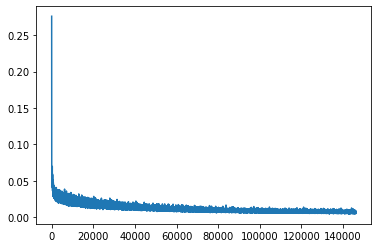

epoch: 79 	 step:0 	 loss: 0.006257
epoch: 79 	 step:100 	 loss: 0.005124
epoch: 79 	 step:200 	 loss: 0.005448
epoch: 79 	 step:300 	 loss: 0.007286
epoch: 79 	 step:400 	 loss: 0.006142
epoch: 79 	 step:500 	 loss: 0.00577
epoch: 79 	 step:600 	 loss: 0.005939
epoch: 79 	 step:700 	 loss: 0.005877
epoch: 79 	 step:800 	 loss: 0.005705
epoch: 79 	 step:900 	 loss: 0.005739
epoch: 79 	 step:1000 	 loss: 0.006367
epoch: 79 	 step:1100 	 loss: 0.006535
epoch: 79 	 step:1200 	 loss: 0.00596
epoch: 79 	 step:1300 	 loss: 0.005125
epoch: 79 	 step:1400 	 loss: 0.005346
epoch: 79 	 step:1500 	 loss: 0.006491
epoch: 79 	 step:1600 	 loss: 0.005761
epoch: 79 	 step:1700 	 loss: 0.00554
epoch: 79 	 step:1800 	 loss: 0.006409


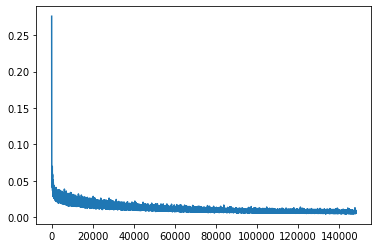

epoch: 80 	 step:0 	 loss: 0.006364
epoch: 80 	 step:100 	 loss: 0.006084
epoch: 80 	 step:200 	 loss: 0.00592
epoch: 80 	 step:300 	 loss: 0.006343
epoch: 80 	 step:400 	 loss: 0.005529
epoch: 80 	 step:500 	 loss: 0.006273
epoch: 80 	 step:600 	 loss: 0.005219
epoch: 80 	 step:700 	 loss: 0.006433
epoch: 80 	 step:800 	 loss: 0.007283
epoch: 80 	 step:900 	 loss: 0.005768
epoch: 80 	 step:1000 	 loss: 0.005171
epoch: 80 	 step:1100 	 loss: 0.005331
epoch: 80 	 step:1200 	 loss: 0.005767
epoch: 80 	 step:1300 	 loss: 0.006113
epoch: 80 	 step:1400 	 loss: 0.006901
epoch: 80 	 step:1500 	 loss: 0.005388
epoch: 80 	 step:1600 	 loss: 0.005808
epoch: 80 	 step:1700 	 loss: 0.006171
epoch: 80 	 step:1800 	 loss: 0.005262


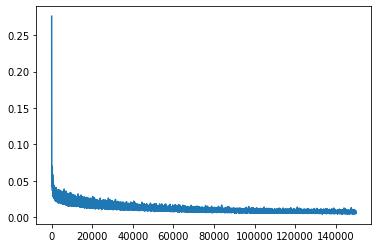

epoch: 81 	 step:0 	 loss: 0.006091
epoch: 81 	 step:100 	 loss: 0.005605
epoch: 81 	 step:200 	 loss: 0.008908
epoch: 81 	 step:300 	 loss: 0.005864
epoch: 81 	 step:400 	 loss: 0.005269
epoch: 81 	 step:500 	 loss: 0.006327
epoch: 81 	 step:600 	 loss: 0.006877
epoch: 81 	 step:700 	 loss: 0.005394
epoch: 81 	 step:800 	 loss: 0.007375
epoch: 81 	 step:900 	 loss: 0.005994
epoch: 81 	 step:1000 	 loss: 0.005697
epoch: 81 	 step:1100 	 loss: 0.006641
epoch: 81 	 step:1200 	 loss: 0.007177
epoch: 81 	 step:1300 	 loss: 0.005596
epoch: 81 	 step:1400 	 loss: 0.005769
epoch: 81 	 step:1500 	 loss: 0.005668
epoch: 81 	 step:1600 	 loss: 0.006042
epoch: 81 	 step:1700 	 loss: 0.006481
epoch: 81 	 step:1800 	 loss: 0.00562


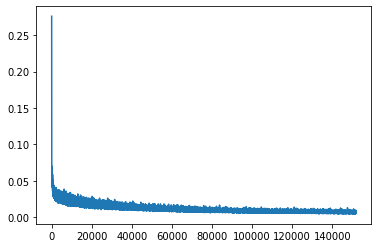

epoch: 82 	 step:0 	 loss: 0.005456
epoch: 82 	 step:100 	 loss: 0.004803
epoch: 82 	 step:200 	 loss: 0.005763
epoch: 82 	 step:300 	 loss: 0.006691
epoch: 82 	 step:400 	 loss: 0.006105
epoch: 82 	 step:500 	 loss: 0.00599
epoch: 82 	 step:600 	 loss: 0.006658
epoch: 82 	 step:700 	 loss: 0.005377
epoch: 82 	 step:800 	 loss: 0.005493
epoch: 82 	 step:900 	 loss: 0.006503
epoch: 82 	 step:1000 	 loss: 0.006146
epoch: 82 	 step:1100 	 loss: 0.00672
epoch: 82 	 step:1200 	 loss: 0.006185
epoch: 82 	 step:1300 	 loss: 0.006553
epoch: 82 	 step:1400 	 loss: 0.005975
epoch: 82 	 step:1500 	 loss: 0.006597
epoch: 82 	 step:1600 	 loss: 0.005274
epoch: 82 	 step:1700 	 loss: 0.005932
epoch: 82 	 step:1800 	 loss: 0.005983


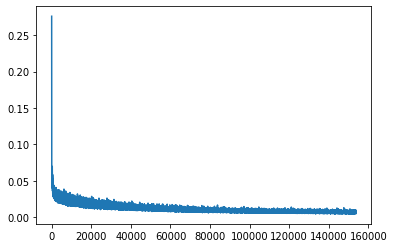

epoch: 83 	 step:0 	 loss: 0.005852
epoch: 83 	 step:100 	 loss: 0.005283
epoch: 83 	 step:200 	 loss: 0.006165
epoch: 83 	 step:300 	 loss: 0.006191
epoch: 83 	 step:400 	 loss: 0.005626
epoch: 83 	 step:500 	 loss: 0.005339
epoch: 83 	 step:600 	 loss: 0.005484
epoch: 83 	 step:700 	 loss: 0.00545
epoch: 83 	 step:800 	 loss: 0.006101
epoch: 83 	 step:900 	 loss: 0.00582
epoch: 83 	 step:1000 	 loss: 0.006385
epoch: 83 	 step:1100 	 loss: 0.006692
epoch: 83 	 step:1200 	 loss: 0.004515
epoch: 83 	 step:1300 	 loss: 0.005759
epoch: 83 	 step:1400 	 loss: 0.006076
epoch: 83 	 step:1500 	 loss: 0.005821
epoch: 83 	 step:1600 	 loss: 0.005982
epoch: 83 	 step:1700 	 loss: 0.005704
epoch: 83 	 step:1800 	 loss: 0.00646


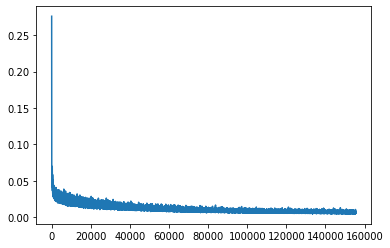

epoch: 84 	 step:0 	 loss: 0.005205
epoch: 84 	 step:100 	 loss: 0.005602
epoch: 84 	 step:200 	 loss: 0.005364
epoch: 84 	 step:300 	 loss: 0.007658
epoch: 84 	 step:400 	 loss: 0.006551
epoch: 84 	 step:500 	 loss: 0.006095
epoch: 84 	 step:600 	 loss: 0.005805
epoch: 84 	 step:700 	 loss: 0.004957
epoch: 84 	 step:800 	 loss: 0.00579
epoch: 84 	 step:900 	 loss: 0.00603
epoch: 84 	 step:1000 	 loss: 0.005437
epoch: 84 	 step:1100 	 loss: 0.0055
epoch: 84 	 step:1200 	 loss: 0.005048
epoch: 84 	 step:1300 	 loss: 0.005762
epoch: 84 	 step:1400 	 loss: 0.005484
epoch: 84 	 step:1500 	 loss: 0.005535
epoch: 84 	 step:1600 	 loss: 0.006449
epoch: 84 	 step:1700 	 loss: 0.005393
epoch: 84 	 step:1800 	 loss: 0.006473


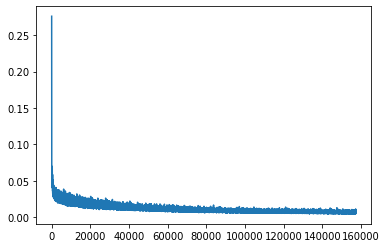

epoch: 85 	 step:0 	 loss: 0.006325
epoch: 85 	 step:100 	 loss: 0.005109
epoch: 85 	 step:200 	 loss: 0.004877
epoch: 85 	 step:300 	 loss: 0.005032
epoch: 85 	 step:400 	 loss: 0.005985
epoch: 85 	 step:500 	 loss: 0.005647
epoch: 85 	 step:600 	 loss: 0.006167
epoch: 85 	 step:700 	 loss: 0.00535
epoch: 85 	 step:800 	 loss: 0.005844
epoch: 85 	 step:900 	 loss: 0.005855
epoch: 85 	 step:1000 	 loss: 0.005699
epoch: 85 	 step:1100 	 loss: 0.006081
epoch: 85 	 step:1200 	 loss: 0.005611
epoch: 85 	 step:1300 	 loss: 0.006239
epoch: 85 	 step:1400 	 loss: 0.006008
epoch: 85 	 step:1500 	 loss: 0.006629
epoch: 85 	 step:1600 	 loss: 0.006171
epoch: 85 	 step:1700 	 loss: 0.005191
epoch: 85 	 step:1800 	 loss: 0.00602


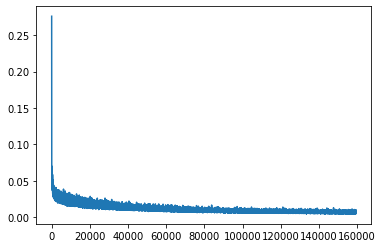

epoch: 86 	 step:0 	 loss: 0.006039
epoch: 86 	 step:100 	 loss: 0.005393
epoch: 86 	 step:200 	 loss: 0.007797
epoch: 86 	 step:300 	 loss: 0.004863
epoch: 86 	 step:400 	 loss: 0.006491
epoch: 86 	 step:500 	 loss: 0.006744
epoch: 86 	 step:600 	 loss: 0.005981
epoch: 86 	 step:700 	 loss: 0.006506
epoch: 86 	 step:800 	 loss: 0.00588
epoch: 86 	 step:900 	 loss: 0.005726
epoch: 86 	 step:1000 	 loss: 0.005698
epoch: 86 	 step:1100 	 loss: 0.006566
epoch: 86 	 step:1200 	 loss: 0.006889
epoch: 86 	 step:1300 	 loss: 0.006603
epoch: 86 	 step:1400 	 loss: 0.006487
epoch: 86 	 step:1500 	 loss: 0.005803
epoch: 86 	 step:1600 	 loss: 0.005799
epoch: 86 	 step:1700 	 loss: 0.005641
epoch: 86 	 step:1800 	 loss: 0.005379


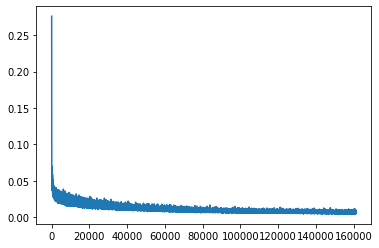

epoch: 87 	 step:0 	 loss: 0.00524
epoch: 87 	 step:100 	 loss: 0.006175
epoch: 87 	 step:200 	 loss: 0.006764
epoch: 87 	 step:300 	 loss: 0.005109
epoch: 87 	 step:400 	 loss: 0.006823
epoch: 87 	 step:500 	 loss: 0.006414
epoch: 87 	 step:600 	 loss: 0.005533
epoch: 87 	 step:700 	 loss: 0.005942
epoch: 87 	 step:800 	 loss: 0.006383
epoch: 87 	 step:900 	 loss: 0.005985
epoch: 87 	 step:1000 	 loss: 0.005257
epoch: 87 	 step:1100 	 loss: 0.00617
epoch: 87 	 step:1200 	 loss: 0.005909
epoch: 87 	 step:1300 	 loss: 0.006024
epoch: 87 	 step:1400 	 loss: 0.005678
epoch: 87 	 step:1500 	 loss: 0.005532
epoch: 87 	 step:1600 	 loss: 0.007575
epoch: 87 	 step:1700 	 loss: 0.007478
epoch: 87 	 step:1800 	 loss: 0.006658


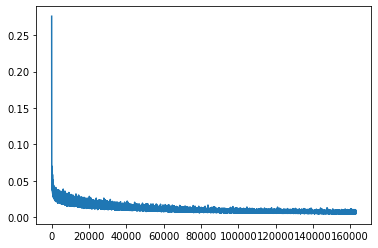

epoch: 88 	 step:0 	 loss: 0.005096
epoch: 88 	 step:100 	 loss: 0.005803
epoch: 88 	 step:200 	 loss: 0.005099
epoch: 88 	 step:300 	 loss: 0.00555
epoch: 88 	 step:400 	 loss: 0.005359
epoch: 88 	 step:500 	 loss: 0.004776
epoch: 88 	 step:600 	 loss: 0.005887
epoch: 88 	 step:700 	 loss: 0.005506
epoch: 88 	 step:800 	 loss: 0.008839
epoch: 88 	 step:900 	 loss: 0.006213
epoch: 88 	 step:1000 	 loss: 0.005626
epoch: 88 	 step:1100 	 loss: 0.004831
epoch: 88 	 step:1200 	 loss: 0.00615
epoch: 88 	 step:1300 	 loss: 0.005854
epoch: 88 	 step:1400 	 loss: 0.005834
epoch: 88 	 step:1500 	 loss: 0.005749
epoch: 88 	 step:1600 	 loss: 0.005627
epoch: 88 	 step:1700 	 loss: 0.006262
epoch: 88 	 step:1800 	 loss: 0.005142


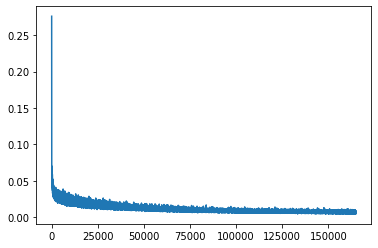

epoch: 89 	 step:0 	 loss: 0.006307
epoch: 89 	 step:100 	 loss: 0.005758
epoch: 89 	 step:200 	 loss: 0.005886
epoch: 89 	 step:300 	 loss: 0.005719
epoch: 89 	 step:400 	 loss: 0.006007
epoch: 89 	 step:500 	 loss: 0.0057
epoch: 89 	 step:600 	 loss: 0.005771
epoch: 89 	 step:700 	 loss: 0.005681
epoch: 89 	 step:800 	 loss: 0.005669
epoch: 89 	 step:900 	 loss: 0.005627
epoch: 89 	 step:1000 	 loss: 0.005548
epoch: 89 	 step:1100 	 loss: 0.006221
epoch: 89 	 step:1200 	 loss: 0.004785
epoch: 89 	 step:1300 	 loss: 0.005765
epoch: 89 	 step:1400 	 loss: 0.005502
epoch: 89 	 step:1500 	 loss: 0.005539
epoch: 89 	 step:1600 	 loss: 0.00781
epoch: 89 	 step:1700 	 loss: 0.005276
epoch: 89 	 step:1800 	 loss: 0.006001


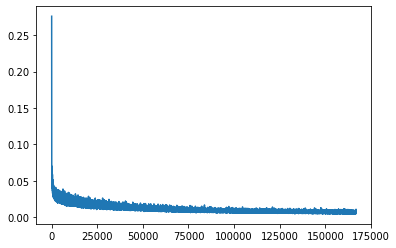

epoch: 90 	 step:0 	 loss: 0.005331
epoch: 90 	 step:100 	 loss: 0.006905
epoch: 90 	 step:200 	 loss: 0.006593
epoch: 90 	 step:300 	 loss: 0.005829
epoch: 90 	 step:400 	 loss: 0.009128
epoch: 90 	 step:500 	 loss: 0.005333
epoch: 90 	 step:600 	 loss: 0.008224
epoch: 90 	 step:700 	 loss: 0.005612
epoch: 90 	 step:800 	 loss: 0.005632
epoch: 90 	 step:900 	 loss: 0.005897
epoch: 90 	 step:1000 	 loss: 0.005163
epoch: 90 	 step:1100 	 loss: 0.005814
epoch: 90 	 step:1200 	 loss: 0.005147
epoch: 90 	 step:1300 	 loss: 0.005441
epoch: 90 	 step:1400 	 loss: 0.005519
epoch: 90 	 step:1500 	 loss: 0.005385
epoch: 90 	 step:1600 	 loss: 0.006153
epoch: 90 	 step:1700 	 loss: 0.005974
epoch: 90 	 step:1800 	 loss: 0.00525


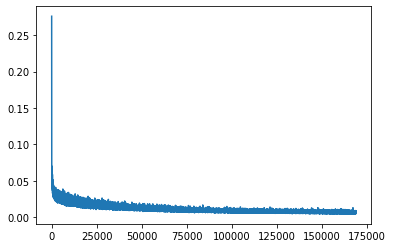

epoch: 91 	 step:0 	 loss: 0.005871
epoch: 91 	 step:100 	 loss: 0.005486
epoch: 91 	 step:200 	 loss: 0.005531
epoch: 91 	 step:300 	 loss: 0.006025
epoch: 91 	 step:400 	 loss: 0.006657
epoch: 91 	 step:500 	 loss: 0.004926
epoch: 91 	 step:600 	 loss: 0.005787
epoch: 91 	 step:700 	 loss: 0.006548
epoch: 91 	 step:800 	 loss: 0.006097
epoch: 91 	 step:900 	 loss: 0.006704
epoch: 91 	 step:1000 	 loss: 0.005372
epoch: 91 	 step:1100 	 loss: 0.005504
epoch: 91 	 step:1200 	 loss: 0.005541
epoch: 91 	 step:1300 	 loss: 0.005673
epoch: 91 	 step:1400 	 loss: 0.005908
epoch: 91 	 step:1500 	 loss: 0.00635
epoch: 91 	 step:1600 	 loss: 0.00596
epoch: 91 	 step:1700 	 loss: 0.005975
epoch: 91 	 step:1800 	 loss: 0.005871


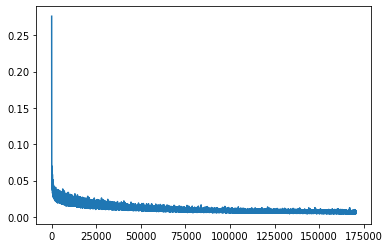

epoch: 92 	 step:0 	 loss: 0.005701
epoch: 92 	 step:100 	 loss: 0.009141
epoch: 92 	 step:200 	 loss: 0.005581
epoch: 92 	 step:300 	 loss: 0.004804
epoch: 92 	 step:400 	 loss: 0.004633
epoch: 92 	 step:500 	 loss: 0.006264
epoch: 92 	 step:600 	 loss: 0.005109
epoch: 92 	 step:700 	 loss: 0.004964
epoch: 92 	 step:800 	 loss: 0.005654
epoch: 92 	 step:900 	 loss: 0.005753
epoch: 92 	 step:1000 	 loss: 0.006859
epoch: 92 	 step:1100 	 loss: 0.005566
epoch: 92 	 step:1200 	 loss: 0.005666
epoch: 92 	 step:1300 	 loss: 0.006032
epoch: 92 	 step:1400 	 loss: 0.005775
epoch: 92 	 step:1500 	 loss: 0.0062
epoch: 92 	 step:1600 	 loss: 0.005753
epoch: 92 	 step:1700 	 loss: 0.006715
epoch: 92 	 step:1800 	 loss: 0.006101


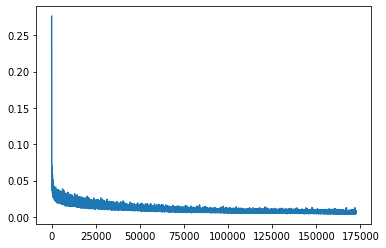

epoch: 93 	 step:0 	 loss: 0.005475
epoch: 93 	 step:100 	 loss: 0.006556
epoch: 93 	 step:200 	 loss: 0.005611
epoch: 93 	 step:300 	 loss: 0.005737
epoch: 93 	 step:400 	 loss: 0.005326
epoch: 93 	 step:500 	 loss: 0.005686
epoch: 93 	 step:600 	 loss: 0.005234
epoch: 93 	 step:700 	 loss: 0.004779
epoch: 93 	 step:800 	 loss: 0.007608
epoch: 93 	 step:900 	 loss: 0.008172
epoch: 93 	 step:1000 	 loss: 0.005552
epoch: 93 	 step:1100 	 loss: 0.005377
epoch: 93 	 step:1200 	 loss: 0.005819
epoch: 93 	 step:1300 	 loss: 0.005907
epoch: 93 	 step:1400 	 loss: 0.005374
epoch: 93 	 step:1500 	 loss: 0.005208
epoch: 93 	 step:1600 	 loss: 0.005371
epoch: 93 	 step:1700 	 loss: 0.00676
epoch: 93 	 step:1800 	 loss: 0.006783


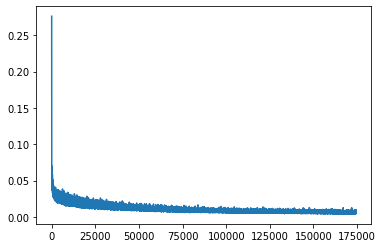

epoch: 94 	 step:0 	 loss: 0.005457
epoch: 94 	 step:100 	 loss: 0.006119
epoch: 94 	 step:200 	 loss: 0.005769
epoch: 94 	 step:300 	 loss: 0.005042
epoch: 94 	 step:400 	 loss: 0.005564
epoch: 94 	 step:500 	 loss: 0.006393
epoch: 94 	 step:600 	 loss: 0.005437
epoch: 94 	 step:700 	 loss: 0.0057
epoch: 94 	 step:800 	 loss: 0.005438
epoch: 94 	 step:900 	 loss: 0.006126
epoch: 94 	 step:1000 	 loss: 0.005477
epoch: 94 	 step:1100 	 loss: 0.00698
epoch: 94 	 step:1200 	 loss: 0.005645
epoch: 94 	 step:1300 	 loss: 0.005307
epoch: 94 	 step:1400 	 loss: 0.005146
epoch: 94 	 step:1500 	 loss: 0.00546
epoch: 94 	 step:1600 	 loss: 0.006165
epoch: 94 	 step:1700 	 loss: 0.005248
epoch: 94 	 step:1800 	 loss: 0.006317


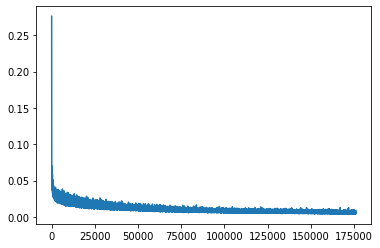

epoch: 95 	 step:0 	 loss: 0.00518
epoch: 95 	 step:100 	 loss: 0.005039
epoch: 95 	 step:200 	 loss: 0.008575
epoch: 95 	 step:300 	 loss: 0.004715
epoch: 95 	 step:400 	 loss: 0.005467
epoch: 95 	 step:500 	 loss: 0.005978
epoch: 95 	 step:600 	 loss: 0.004644
epoch: 95 	 step:700 	 loss: 0.005146
epoch: 95 	 step:800 	 loss: 0.006063
epoch: 95 	 step:900 	 loss: 0.005302
epoch: 95 	 step:1000 	 loss: 0.005613
epoch: 95 	 step:1100 	 loss: 0.005663
epoch: 95 	 step:1200 	 loss: 0.005459
epoch: 95 	 step:1300 	 loss: 0.005191
epoch: 95 	 step:1400 	 loss: 0.005905
epoch: 95 	 step:1500 	 loss: 0.005161
epoch: 95 	 step:1600 	 loss: 0.006217
epoch: 95 	 step:1700 	 loss: 0.005364
epoch: 95 	 step:1800 	 loss: 0.00544


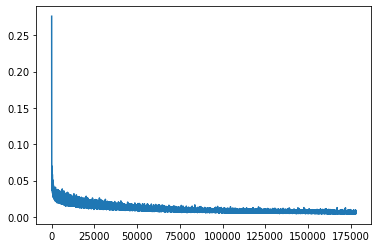

epoch: 96 	 step:0 	 loss: 0.004874
epoch: 96 	 step:100 	 loss: 0.004894
epoch: 96 	 step:200 	 loss: 0.005729
epoch: 96 	 step:300 	 loss: 0.005455
epoch: 96 	 step:400 	 loss: 0.005508
epoch: 96 	 step:500 	 loss: 0.006037
epoch: 96 	 step:600 	 loss: 0.005609
epoch: 96 	 step:700 	 loss: 0.005588
epoch: 96 	 step:800 	 loss: 0.005366
epoch: 96 	 step:900 	 loss: 0.005539
epoch: 96 	 step:1000 	 loss: 0.005435
epoch: 96 	 step:1100 	 loss: 0.005915
epoch: 96 	 step:1200 	 loss: 0.005228
epoch: 96 	 step:1300 	 loss: 0.006
epoch: 96 	 step:1400 	 loss: 0.005021
epoch: 96 	 step:1500 	 loss: 0.006039
epoch: 96 	 step:1600 	 loss: 0.005896
epoch: 96 	 step:1700 	 loss: 0.005404
epoch: 96 	 step:1800 	 loss: 0.005631


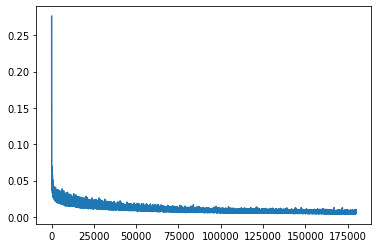

epoch: 97 	 step:0 	 loss: 0.005226
epoch: 97 	 step:100 	 loss: 0.004968
epoch: 97 	 step:200 	 loss: 0.005557
epoch: 97 	 step:300 	 loss: 0.005802
epoch: 97 	 step:400 	 loss: 0.00549
epoch: 97 	 step:500 	 loss: 0.006109
epoch: 97 	 step:600 	 loss: 0.005608
epoch: 97 	 step:700 	 loss: 0.00506
epoch: 97 	 step:800 	 loss: 0.005302
epoch: 97 	 step:900 	 loss: 0.005506
epoch: 97 	 step:1000 	 loss: 0.00535
epoch: 97 	 step:1100 	 loss: 0.00747
epoch: 97 	 step:1200 	 loss: 0.005585
epoch: 97 	 step:1300 	 loss: 0.004914
epoch: 97 	 step:1400 	 loss: 0.005199
epoch: 97 	 step:1500 	 loss: 0.005805
epoch: 97 	 step:1600 	 loss: 0.006046
epoch: 97 	 step:1700 	 loss: 0.005754
epoch: 97 	 step:1800 	 loss: 0.005615


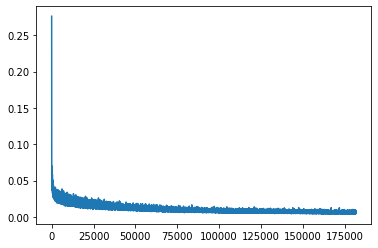

epoch: 98 	 step:0 	 loss: 0.005091
epoch: 98 	 step:100 	 loss: 0.00565
epoch: 98 	 step:200 	 loss: 0.005405
epoch: 98 	 step:300 	 loss: 0.006145
epoch: 98 	 step:400 	 loss: 0.005635
epoch: 98 	 step:500 	 loss: 0.005615
epoch: 98 	 step:600 	 loss: 0.005249
epoch: 98 	 step:700 	 loss: 0.005893
epoch: 98 	 step:800 	 loss: 0.005788
epoch: 98 	 step:900 	 loss: 0.005181
epoch: 98 	 step:1000 	 loss: 0.005929
epoch: 98 	 step:1100 	 loss: 0.006078
epoch: 98 	 step:1200 	 loss: 0.005611
epoch: 98 	 step:1300 	 loss: 0.006117
epoch: 98 	 step:1400 	 loss: 0.006455
epoch: 98 	 step:1500 	 loss: 0.004427
epoch: 98 	 step:1600 	 loss: 0.006064
epoch: 98 	 step:1700 	 loss: 0.006188
epoch: 98 	 step:1800 	 loss: 0.004721


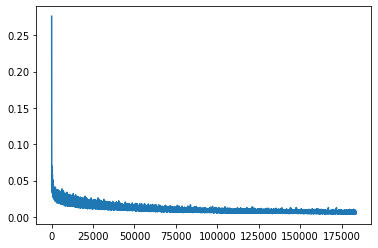

epoch: 99 	 step:0 	 loss: 0.005093
epoch: 99 	 step:100 	 loss: 0.004916
epoch: 99 	 step:200 	 loss: 0.00587
epoch: 99 	 step:300 	 loss: 0.005059
epoch: 99 	 step:400 	 loss: 0.00654
epoch: 99 	 step:500 	 loss: 0.005213
epoch: 99 	 step:600 	 loss: 0.00633
epoch: 99 	 step:700 	 loss: 0.005851
epoch: 99 	 step:800 	 loss: 0.005148
epoch: 99 	 step:900 	 loss: 0.005393
epoch: 99 	 step:1000 	 loss: 0.005984
epoch: 99 	 step:1100 	 loss: 0.005545
epoch: 99 	 step:1200 	 loss: 0.005387
epoch: 99 	 step:1300 	 loss: 0.006603
epoch: 99 	 step:1400 	 loss: 0.006395
epoch: 99 	 step:1500 	 loss: 0.005602
epoch: 99 	 step:1600 	 loss: 0.005559
epoch: 99 	 step:1700 	 loss: 0.005389
epoch: 99 	 step:1800 	 loss: 0.005576


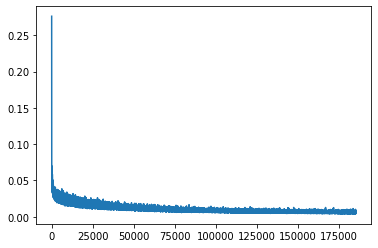

epoch: 100 	 step:0 	 loss: 0.005962
epoch: 100 	 step:100 	 loss: 0.006034
epoch: 100 	 step:200 	 loss: 0.005781
epoch: 100 	 step:300 	 loss: 0.005473
epoch: 100 	 step:400 	 loss: 0.005724
epoch: 100 	 step:500 	 loss: 0.005247
epoch: 100 	 step:600 	 loss: 0.005495
epoch: 100 	 step:700 	 loss: 0.00497
epoch: 100 	 step:800 	 loss: 0.00489
epoch: 100 	 step:900 	 loss: 0.00597
epoch: 100 	 step:1000 	 loss: 0.005234
epoch: 100 	 step:1100 	 loss: 0.006623
epoch: 100 	 step:1200 	 loss: 0.005009
epoch: 100 	 step:1300 	 loss: 0.00559
epoch: 100 	 step:1400 	 loss: 0.005704
epoch: 100 	 step:1500 	 loss: 0.005272
epoch: 100 	 step:1600 	 loss: 0.005417
epoch: 100 	 step:1700 	 loss: 0.004947
epoch: 100 	 step:1800 	 loss: 0.005243


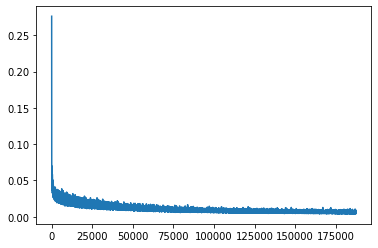

In [11]:
### TRAIN MODEL ###

num_epochs = 100

history = train_model(gen, opt, device, dataloader['train'], epochs=num_epochs)

In [12]:
def test_generator(model, device, testloader, one_batch=False):
    # put model to eval mode
    model = model.to(device=device)
    model.eval()

    # move test images to device and reduce to magnitude information in fourier space
    test_images = []
    outputs = []
    
    for data in testloader:
        data = data.to(device=device)
        test_images.append(data.cpu().numpy())
        magn = calc_mags(data)
        out = model(magn)
        
        outputs.append(out.cpu().detach().numpy())
        if one_batch: break
    
    return np.concatenate(test_images), np.concatenate(outputs)

In [13]:
# Calculate test predictions #

test_original, test_predicted = test_generator(gen, device, dataloader['test'])
print(test_original.shape)
print(test_predicted.shape)

/home/alobe101/.local/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


(8000, 1, 28, 28)
(8000, 1, 28, 28)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


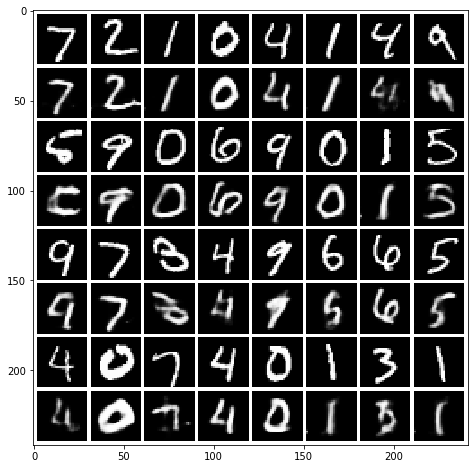

Registered:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


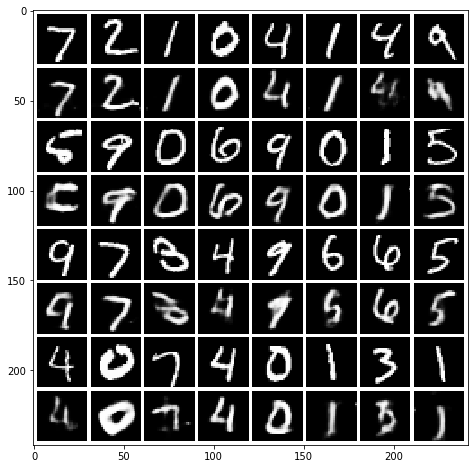

In [14]:
# Print predictions #
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    test_predicted[:32, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/signal-prediction/e2e-cnn-l2.png")

print("Registered:")
results_reg = register_croco(test_predicted[:32], test_original[:32])
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    results_reg[:, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)        
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/signal-prediction/e2e-cnn-l2-reg.png")

In [15]:
# Benchmark test predictions #

benchmark(pred=test_predicted[:1024], true=test_original[:1024], check_all=True)

Signal error:
  MSE: 0.04484168899307406, std: 0.018139278798544274
  MAE: 0.08071929651850951, std: 0.02436509169070262
  SSIM: 0.6114317309609596, std: 0.1348324676884582
  Sharpness: 0.11737415016003884, std: 0.03044046967842394
  PhCo-MSE: 0.04899893780475395, std: 0.029168163316214513
  PhCo-MAE: 0.08453613457095344, std: 0.03472490398536586
  PhCo-SSIM: 0.5981352772140793, std: 0.1683232615982811
  CroCo-MSE: 0.034342705679591745, std: 0.013831924336832635
  CroCo-MAE: 0.06837657940559438, std: 0.02099334758547659
  CroCo-SSIM: 0.6794571061087383, std: 0.11199881550875751

Magnitude error:
  MSE Magnitude: 10.453720541943762, std: 3.9849230373790334

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [0.00, 1.00] - should be in [0, 1]

Markdown table values:
 0.04484 | 0.08072 | 0.6114 | 0.1174 | 0.04900 | 0.08454 | 0.5981 | 0.03434 | 0.06838 | 0.6795 | 10.45 |


## Evaluation for direct signal prediction  (1024 samples)

#### Simple L2 squared loss

| Nr | Loss | Size | epochs| MSE | MAE | SSIM | SHRP | PhaCo-MSE | PhaCo-MAE | PhaCo-SSIM | CroCo-MSE | CroCo-MAE | CroCo-SSIM | MSE Magn
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | L2 | 2048 | 100 | 0.04484 | 0.08072 | 0.6114 | 0.1174 | 0.04900 | 0.08454 | 0.5981 | 0.03434 | 0.06838 | 0.6795 | 10.45 |
| 1 | L1 | 2048 | 100 | 0.02187 | 0.04441 | 0.8209 | 0.08291 | 0.01656 | 0.03774 | 0.8536 | 0.01480 | 0.03556 | 0.8662 | 3.073 |
  
---

Signal error:
  MSE: 0.04484168899307406, std: 0.018139278798544274
  MAE: 0.08071929651850951, std: 0.02436509169070262
  SSIM: 0.6114317309609596, std: 0.1348324676884582
  Sharpness: 0.11737415016003884, std: 0.03044046967842394
  PhCo-MSE: 0.04899893780475395, std: 0.029168163316214513
  PhCo-MAE: 0.08453613457095344, std: 0.03472490398536586
  PhCo-SSIM: 0.5981352772140793, std: 0.1683232615982811
  CroCo-MSE: 0.034342705679591745, std: 0.013831924336832635
  CroCo-MAE: 0.06837657940559438, std: 0.02099334758547659
  CroCo-SSIM: 0.6794571061087383, std: 0.11199881550875751

Magnitude error:
  MSE Magnitude: 10.453720541943762, std: 3.9849230373790334

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [0.00, 1.00] - should be in [0, 1]


---

In [16]:
### Exchange original phase with FC Net computed phase ###

orig_fft = np.fft.fft2(test_original[:1024])
orig_magn = np.abs(orig_fft)
orig_phase = np.angle(orig_fft)
test_fft = np.fft.fft2(test_predicted[:1024])
test_magn = np.abs(test_fft)
test_Phase = np.angle(test_fft)

Combined = orig_magn * np.exp(1j * test_Phase)
combined = np.real(np.fft.ifft2(Combined)).astype(np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


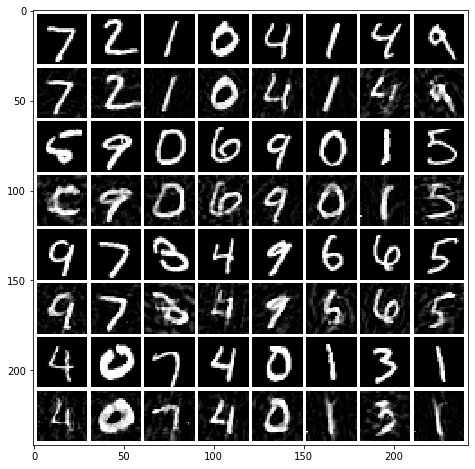

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Registered:


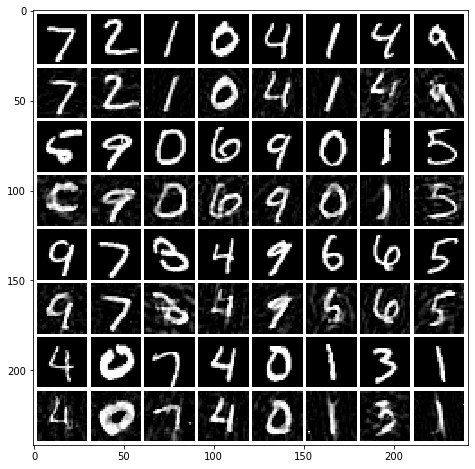

In [17]:
# Print original phase predictions #
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    combined[:32, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/signal-prediction/e2e-cnn-magn-l2.png")

print("Registered:")
results_reg = register_croco(combined[:32], test_original[:32])
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    results_reg[:, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)        
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/signal-prediction/e2e-cnn-magn-l2-reg.png")

In [18]:
# Benchmark predicted phase with original magnitude #

benchmark(pred=combined, true=test_original[:1024], check_all=True)

Signal error:
  MSE: 0.05149729140885029, std: 0.024384445396402013
  MAE: 0.13330106666035135, std: 0.03641892274286909
  SSIM: 0.4729530553319329, std: 0.15758689130759096
  Sharpness: 0.1912950997490098, std: 0.04623772927422429
  PhCo-MSE: 0.053282011138890084, std: 0.034640578889201246
  PhCo-MAE: 0.1345616385297035, std: 0.044779081874230554
  PhCo-SSIM: 0.4724656193816783, std: 0.18240789479580213
  CroCo-MSE: 0.035635594464565656, std: 0.017535542196257022
  CroCo-MAE: 0.11607183028900181, std: 0.033417164399373984
  CroCo-SSIM: 0.5591342136783847, std: 0.1272004461087715

Magnitude error:
  MSE Magnitude: 2.691167380247297e-14, std: 1.1247993583264839e-14

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.69, 1.85] - should be in [0, 1]

Markdown table values:
 0.05150 | 0.1333 | 0.4730 | 0.1913 | 0.05328 | 0.1346 | 0.4725 | 0.03564 | 0.1161 | 0.5591 | 0.00000000000002691 |


## Evaluation for signal prediction with original magnitude  (1024 samples)

#### Simple L2 squared loss

| Nr | Loss | Size | epochs| MSE | MAE | SSIM | SHRP | PhaCo-MSE | PhaCo-MAE | PhaCo-SSIM | CroCo-MSE | CroCo-MAE | CroCo-SSIM | MSE Magn
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | L2 | 2048 | 100 | 0.05150 | 0.1333 | 0.4730 | 0.1913 | 0.05328 | 0.1346 | 0.4725 | 0.03564 | 0.1161 | 0.5591 | 0.00000000000002691 |
| 1 | L1 | 2048 | 100 | 0.02113 | 0.07190 | 0.7511 | 0.1259 | 0.01506 | 0.06440 | 0.7867 | 0.01326 | 0.06216 | 0.7993 | 0.00000000000002497 |


---

Signal error:
  MSE: 0.05149729140885029, std: 0.024384445396402013
  MAE: 0.13330106666035135, std: 0.03641892274286909
  SSIM: 0.4729530553319329, std: 0.15758689130759096
  Sharpness: 0.1912950997490098, std: 0.04623772927422429
  PhCo-MSE: 0.053282011138890084, std: 0.034640578889201246
  PhCo-MAE: 0.1345616385297035, std: 0.044779081874230554
  PhCo-SSIM: 0.4724656193816783, std: 0.18240789479580213
  CroCo-MSE: 0.035635594464565656, std: 0.017535542196257022
  CroCo-MAE: 0.11607183028900181, std: 0.033417164399373984
  CroCo-SSIM: 0.5591342136783847, std: 0.1272004461087715

Magnitude error:
  MSE Magnitude: 2.691167380247297e-14, std: 1.1247993583264839e-14

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.69, 1.85] - should be in [0, 1]
  
---

Signal error:
  MSE: 0.021125091257147233, std: 0.020932313346634687
  MAE: 0.07190467271266243, std: 0.03368128136346358
  SSIM: 0.7511436888918843, std: 0.15076239412942097
  Sharpness: 0.12588922476318418, std: 0.04148573847770379
  PhCo-MSE: 0.015058456581584778, std: 0.011976591068361414
  PhCo-MAE: 0.06440351995206584, std: 0.025883267071934626
  PhCo-SSIM: 0.7867014190377637, std: 0.11054468656386912
  CroCo-MSE: 0.013259222480598964, std: 0.00898829486993446
  CroCo-MAE: 0.06216150172895141, std: 0.024048244519208718
  CroCo-SSIM: 0.7992694885347135, std: 0.0948208105543787

Magnitude error:
  MSE Magnitude: 2.496716730071401e-14, std: 1.091175809188098e-14

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.50, 1.67] - should be in [0, 1]